# Прогнозирование влияния условий жизни студентов на их успеваемость по математике

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

In [2]:
stud.head(50)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [6]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

На первый взгляд, объем данных и количество столбцов параметров, потенциально влияющих на успеваемость по математике, впечатляют. Сравнив перечень столбцов с перечнем столбцов в модуле, выявлен лишний столбец с непонятными данными : "studytime, granular". Удалим его.

In [2]:
stud.drop(['studytime, granular'], inplace = True, axis = 1)

Далее проанализируем данные в каждом столбце.

In [12]:
stud.loc[:, ["school"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [16]:
stud.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

Можно сделать вывод, что данная выборка имеет отношение к двум школам. Все строки заполнены.

In [18]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'score'],
      dtype='object')

In [19]:
stud.loc[:, ["sex"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [20]:
stud.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

Все значения колонки "пол" заполнены. Предлагаю посмотреть количество девочек и мальчиков, которые учатся в каждой школе.

In [3]:
school_GP = stud[stud['school'] == 'GP']

In [4]:
school_MS = stud[stud['school'] == 'MS']

F    183
M    166
Name: sex, dtype: int64

Отношение количества девочек к числу мальчикво в школе "GP"= 1.1024096385542168


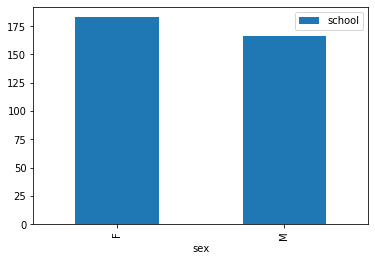

In [287]:
school_GP.pivot_table(values = 'school', index = 'sex', aggfunc = 'count').plot(kind = 'bar')
display(school_GP.sex.value_counts())
print('Отношение количества девочек к числу мальчикво в школе "GP"=', 183/166)

Отношение количества девочек к числу мальчикво в школе "MS"= 1.1904761904761905


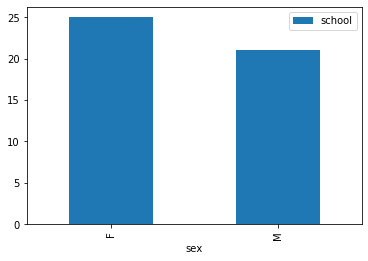

In [286]:
school_MS.pivot_table(values = 'school', index = 'sex', aggfunc = 'count').plot(kind = 'bar')
school_MS.sex.value_counts()
print('Отношение количества девочек к числу мальчикво в школе "MS"=', 25/21)

В целом, число мальчиков и девочек в школах распределено одинаково.

In [42]:
stud.loc[:, ['age']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


Колонка возраста детей заполнена полностью. Проверим, нет ли в ней ошибочных данных. По условию, возраст детей должен находиться в промежутке 15:22.

In [45]:
print('Максимальный возраст ребенка в выборке', stud.age.max())
print('Минимальный возраст ребенка в выборке', stud.age.min())

Максимальный возраст ребенка в выборке 22
Минимальный возраст ребенка в выборке 15


Колонка возраста в датасете соответствует условию задачи. Предлагаю сразу перейти к колонке оценок, для того чтобы затем вернуться к возрасту учащихся и посмотреть как распределены оценки в зависимости от возраста,школ и пола учащихся.

In [46]:
stud.loc[:, ['score']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [66]:
score = stud.loc[:, ['score']]
score.tail(50)

,score
345,70.0
346,80.0
347,45.0
348,75.0
349,65.0
350,NaN
351,65.0
352,40.0
353,40.0
354,55.0


In [67]:
score_stats = score.score.value_counts()
score_stats.sort_values(ascending=False)
#len(score_stats)
#len(score)

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

Найдены не числовые значения(NaN) в столбце score. Очевидно, это пропуски в информации об учениках и об их успеваемости. Чтобы не терять статистические данные, предлагаю заполнить эти пропуски средней успеваимостью, исходя из пола и школы, где учится школьник.

In [5]:
GP_mean_M = school_GP[school_GP['sex'] == 'M'].score.mean()
GP_mean_F = school_GP[school_GP['sex'] == 'F'].score.mean()
MS_mean_M = school_MS[school_MS['sex'] == 'M'].score.mean()
MS_mean_F = school_MS[school_MS['sex'] == 'F'].score.mean()
print('Средняя оценка в школе GP у мальчиков', round(GP_mean_M,2),
     '\nСредняя оценка в школе GP у девочек', round(GP_mean_F,2),
     '\nСредняя оценка в школе MS у мальчиков', round(MS_mean_M,2),
     '\nСредняя оценка в школе GP у девочек', MS_mean_F)

Средняя оценка в школе GP у мальчиков 55.3 
Средняя оценка в школе GP у девочек 50.17 
Средняя оценка в школе MS у мальчиков 49.25 
Средняя оценка в школе GP у девочек 49.6


In [6]:
def fill_score(row):
    if pd.isnull(row['score']):
        if row['school'] == 'GP' and row['sex'] == 'M':
            return GP_mean_M
        if row['school'] == 'GP' and row['sex'] == 'F':
            return GP_mean_F
        if row['school'] == 'MS' and row['sex'] == 'M':
            return MS_mean_M
        return MS_mean_F
    return row['score']

In [7]:
stud['score'] = stud.apply(fill_score, axis = 1)

In [8]:
stud.loc[[350],['school','sex','score']]

,school,sex,score
350,MS,M,49.25


Замена прошла успешно. Интересно, в какой школе средний бал у учеников выше.

3.170021638393308

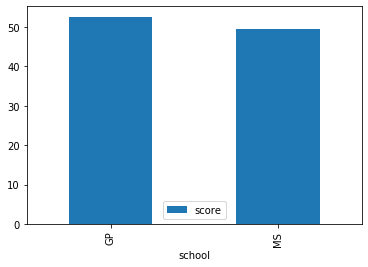

In [102]:
stud.pivot_table(values = 'score', 
               index = 'school', 
               aggfunc = 'mean').plot(kind = 'bar')
display(stud[stud['school'] == 'GP'].score.mean() - stud[stud['school'] == 'MS'].score.mean())

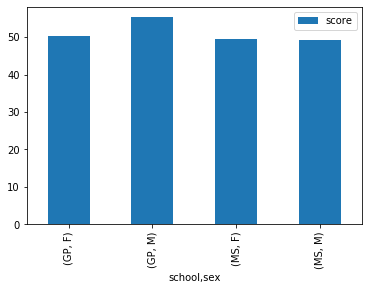

In [100]:
stud.pivot_table(values = 'score', 
               index = ['school','sex'], 
               aggfunc = 'mean').plot(kind = 'bar')

В GP средний балл у студентов немного выше, чем в MS. Причем, лучше всех учатся мальчики в GP. Пойдем дальше по остальным колонкам.

In [103]:
stud.loc[:,['age']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


Все значения в колонке заполнены. Посмотрим на возраст учеников в двух школах.

Средний возраст детей в GP 16.52 
Средний возраст детей в MS 18.02


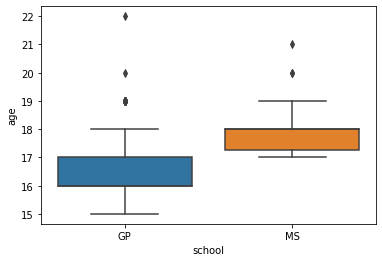

In [107]:
sns.boxplot(x = 'school', y = 'age', data = stud)
print('Средний возраст детей в GP', round(stud[stud['school'] == 'GP'].age.mean(),2),
     '\nСредний возраст детей в MS', round(stud[stud['school'] == 'MS'].age.mean(),2))

In [117]:
print('Количество детей старше 18 лет в GP -', stud[(stud['age'] > 18) & (stud['school'] == "GP")].age.count())
GP_over_18 = stud[(stud['age'] > 18) & (stud['school'] == "GP")].age.count()
print('Количество детей в выборке GP -', len(school_GP))
print('Соотношение детей старше 18 лет к количеству детей в выборке по GP -', round(GP_over_18/len(school_GP),2))
MS_over_18 = stud[(stud['age'] > 18) & (stud['school'] == "MS")].age.count()
print('Количество детей старше 18 лет в MS -', stud[(stud['age'] > 18) & (stud['school'] == "MS")].age.count())
print('Соотношение детей старше 18 лет к количеству детей в выборке по MS -', round(MS_over_18/len(school_MS),2))

Количество детей старше 18 лет в GP - 20
Количество детей в выборке GP - 349
Соотношение детей старше 18 лет к количеству детей в выборке по GP - 0.06
Количество детей старше 18 лет в MS - 9
Соотношение детей старше 18 лет к количеству детей в выборке по MS - 0.2


Из данных выше можно сделать предположение, что одна из школ является учебным заведением для учеников по-старше. Отсюда можно сделать вывод и о успеваемости(почему в MS она чуть ниже чем в GP). Наверное, из-за того что там учатся дети по-старше, учится в MS сложнее, чем в GP. Продолжим анализ столбцов.

In [121]:
stud.loc[:, ['address']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [123]:
stud.address.head(10)

0      U
1      U
2      U
3      U
4      U
5      U
6    NaN
7      U
8      U
9      U
Name: address, dtype: object

В данных имеются не числовые значения (NaN). В этот раз заменить их средним значением по какой-либо выборке не выйдет, так как значения этой колонки не числовые.

In [124]:
stud.address.value_counts() #В рассмотренной выборке учащихся всего 2 адреса

U    295
R     83
Name: address, dtype: int64

In [125]:
stud.school.value_counts() #Распределение учащихся по школам схоже с распределением учащихся по адресам.

GP    349
MS     46
Name: school, dtype: int64

U    277
R     60
Name: address, dtype: int64

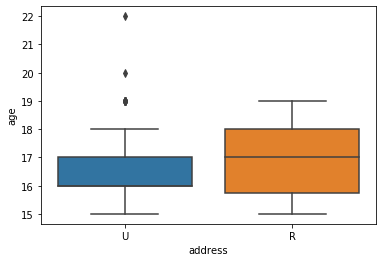

In [132]:
display(school_GP.address.value_counts()) #Подавляющее большинство учащихся школы "GP"-это дети из "U"
sns.boxplot(x = 'address', y = 'age', data = school_GP) #Подавляющее большинство учащихся в школе "GP"-это дети до 18

In [137]:
display(school_GP[school_GP['age'] > 18].address.count()) #В школе "GP" учится всего 19 детей старше 18 лет
school_GP[school_GP['address'] == 'R'].age.max() #И ни одного ребенка с адресом "R" старше 19 лет

19

19

In [138]:
round(school_GP[(school_GP['address'] == 'U')&(school_GP['age'] < 18)].age.mean()) #Средний возраст детей младше 18 лет в школе "GP"=16

16

R    23
U    18
Name: address, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 349 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  41 non-null     object
dtypes: object(1)
memory usage: 2.0+ KB


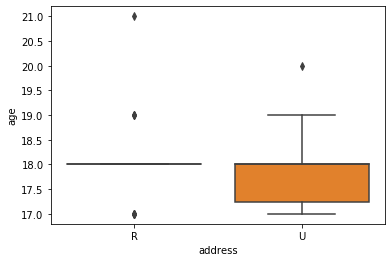

In [140]:
display(school_MS.address.value_counts()) #В школу "MS" ездит сопоставимое число учащихся из "U" и из "R"
display(school_MS[school_MS['address'] == 'R'].age.mean()) #Информация об адресе 5 учащихся из школы "MS" отсутствует
sns.boxplot(x = 'address', y = 'age', data = school_MS)

In [144]:
display(school_MS[school_MS['age'] > 18].address.count()) #В школе "MS" учится всего 7 детей старше 18 лет
display(school_MS[school_MS['address'] == 'R'].age.mean())#Средний возраст учащихся с адресами в "R" и в "U" в школе "MS" одинаковый
display(school_MS[school_MS['address'] == 'U'].age.mean())
school_MS[school_MS['address'] == 'U'].age.max() #И ни одного ребенка с адресом "R" старше 19 лет

7

18.043478260869566

17.944444444444443

20

Можно сделать предположение, что территориально школа "GP" находится ближе к адресу "U", исходя из числа учащихся в выборках школ. Хотя и стоит заметить, что средний возраст учащихся в школе "MS" явно превосходит возраст учащихся в школе "GP", что может свидетельствовать о том, что в школу "MS" поступает не так много школьников, следовательно, в этой школе может осуществляться довузовская подготовка учеников, потому что количество учащихся в этой школе с адресами проживания в "U" и в "R" приблизительно одинаковое.

In [145]:
stud.loc[:,['famsize']].info() #27 пропусков в данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [146]:
stud.famsize.value_counts() #У 261 ученика из выборки размер семьи больше 3 человек

GT3    261
LE3    107
Name: famsize, dtype: int64

Интересно, есть ли зависимость между размером семьи и успеваемостью ученика

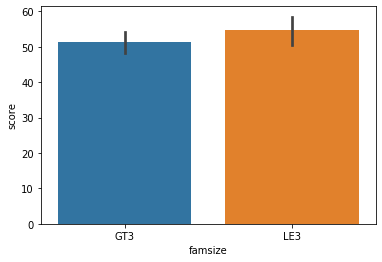

In [147]:
sns.barplot(x = 'famsize', y = 'score', data = stud) #На первый взгляд, выборка утверждает, что чем меньше детей, тем выше успеваемость

Интересное наблюдение. Надо разбираться так ли это на самом деле и нет ли здесь подводных камней.Посмотрим как распределена зависимость размера семьи по школам и по городам.

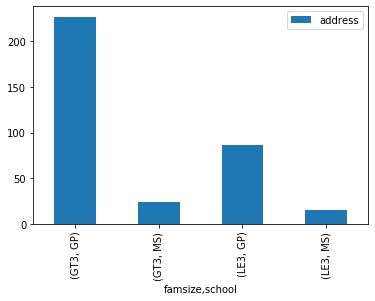

In [149]:
stud.pivot_table(values = 'address', 
               index = ['famsize','school'], 
               aggfunc = 'count').plot(kind = 'bar')

In [151]:
famsize_GP = school_GP[school_GP['famsize'] == 'GT3'].school.count()/school_GP[school_GP['famsize'] == 'LE3'].school.count()
famsize_MS = school_MS[school_MS['famsize'] == 'GT3'].school.count()/school_MS[school_MS['famsize'] == 'LE3'].school.count()

In [153]:
print('Пропорция учащихся GT3/LE3 в школе "GP"=', round(famsize_GP,2),
     '\nПропорция учащихся GT3/LE3 в школе "MS"=', round(famsize_MS,2))

Пропорция учащихся GT3/LE3 в школе "GP"= 2.56 
Пропорция учащихся GT3/LE3 в школе "MS"= 1.75


В школе "GP" учится больше детей с большими семьями. Пока что сложно выдвигать какие либо предположения, основываясь только на этой информации. Посмотрим как распределена эта зависимость от адреса учащихся.

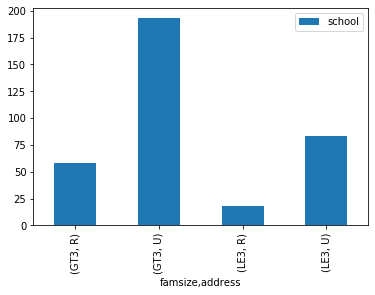

In [158]:
famsize_U = stud[(stud['famsize'] == 'GT3') & (stud['address'] == 'U')].address.count()/stud[(stud['famsize'] == 'LE3') & (stud['address'] == 'U')].address.count()
famsize_R = stud[(stud['famsize'] == 'GT3') & (stud['address'] == 'R')].address.count()/stud[(stud['famsize'] == 'LE3') & (stud['address'] == 'R')].address.count()
stud.pivot_table(values = 'school', 
               index = ['famsize','address'], 
               aggfunc = 'count').plot(kind = 'bar')

In [159]:
print('Пропорция учащихся GT3/LE3 по адресу "U"=', round(famsize_U,2),
     '\nПропорция учащихся GT3/LE3 в школе "R"=', round(famsize_R,2))

Пропорция учащихся GT3/LE3 по адресу "U"= 2.33 
Пропорция учащихся GT3/LE3 в школе "R"= 3.22


В нашей выборке пропорция семей с количеством членов больше 3-х по адресу "R" больше, чем аналогичное значение для адреса "U". Рассмотрим зависимость успеваемости от адресов и от количества членов семьи.

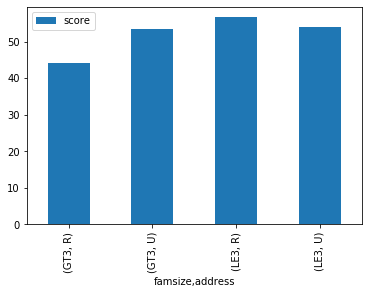

In [160]:
stud.pivot_table(values = 'score', 
               index = ['famsize','address'], 
               aggfunc = 'mean').plot(kind = 'bar')

Интересно, что успеваемость детей в семьях, где больше 3-х членов по адресу "U" заметно отличается от успеваемости таких же семей (с количеством членов более 3-х) в городе "R". Ранее уже отмечалось, что большая часть детей, проживающих по адресу "R", ходит в старшую школу "MS", где, возможно, учиться сложнее. Посмотрим какое количество детей с большими семьями, проживающих по адресу "R", ходит в школу "MS', а какое в школу "GP".

In [163]:
stud[(stud['address'] == 'R') & (stud['famsize'] == 'GT3')].school.value_counts()

GP    42
MS    16
Name: school, dtype: int64

In [166]:
print('Отношение числа учащихся в школе GP, проживающих по адресу "R", и имеющих большие семьи к \nобщему числу учащихся в этой школе', round(42/349,2))

Отношение числа учащихся в школе GP, проживающих по адресу "R", и имеющих большие семьи к 
общему числу учащихся в этой школе 0.12


In [167]:
print('Отношение числа учащихся в школе MS, проживающих по адресу "R", и имеющих большие семьи к \nобщему числу учащихся в этой школе', round(16/46,2))

Отношение числа учащихся в школе MS, проживающих по адресу "R", и имеющих большие семьи к 
общему числу учащихся в этой школе 0.35


Из данных, которые мы получили, складывается чувство, что дети из больших семей, проживающие по адресу "R", учатся хуже остальных.Учитывая, что в выборке не много детей относится к школе MS, а также то, что 0.35 от их числа - это дети, проживающие в "R" и с размером семьи более 3-х членов, предлагаю посмотреть как выглядит успеваемость именно в рамках этой школы детей из района "R" с учетом размера семьи.

In [169]:
school_MS_R = school_MS[school_MS['address'] == 'R']

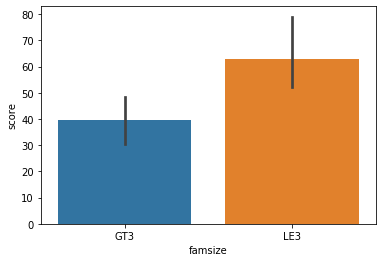

In [172]:
sns.barplot(x = 'famsize', y = 'score', data = school_MS_R)

Средний балл в семьях с количеством детей больше 3-х, проживающих в районе "R" и обучающихся в школе MS заметно ниже среднего балла детей с количеством членов менее 3-х, проживающих в том же районе и учащихся в той же школе. Интересно, какова средняя успеваемость больших семей, проживающих в районе "U" и учащихся в школе "MS".

In [173]:
school_MS_U = school_MS[school_MS['address'] == 'U']

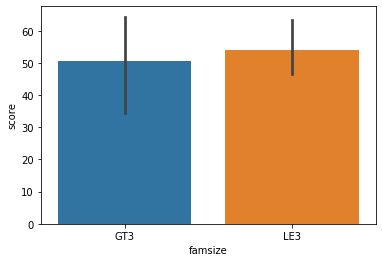

In [174]:
sns.barplot(x = 'famsize', y = 'score', data = school_MS_U)

Подозрительно большое стандартное отклонение в наборах данных об успеваемости детей. Причем, судя по графикам, оно большое для маленьких семей из района "R" и для больших семей из района "U". Надо посмотреть значения среднего и стандартного отклонения для больших и для маленьких семей из районов "R" и "U".

In [178]:
R_LE3_MS_mean = stud[(stud['address'] == 'R')&(stud['famsize'] == 'LE3')&(stud['school'] == 'MS')].score.mean()
R_LE3_MS_std = stud[(stud['address'] == 'R')&(stud['famsize'] == 'LE3')&(stud['school'] == 'MS')].score.std()
U_GT3_MS_mean = stud[(stud['address'] == 'U')&(stud['famsize'] == 'GT3')&(stud['school'] == 'MS')].score.mean()
U_GT3_MS_std = stud[(stud['address'] == 'U')&(stud['famsize'] == 'GT3')&(stud['school'] == 'MS')].score.std()
print('Средняя успеваемость в маленьких семьях в школе "MS" из района "R"=', R_LE3_MS_mean,
     '\nСтандартное отклонение успеваемости в маленьких семьях в школе "MS" из района "R"=', R_LE3_MS_std,
     '\nСредняя успеваемость в больших семьях в школе "MS" из района "U"=', U_GT3_MS_mean,
     '\nСтандартное отклонение успеваемости в больших семьях в школе "MS" из района "U"=',U_GT3_MS_std)

Средняя успеваемость в маленьких семьях в школе "MS" из района "R"= 63.0 
Стандартное отклонение успеваемости в маленьких семьях в школе "MS" из района "R"= 18.57417562100671 
Средняя успеваемость в больших семьях в школе "MS" из района "U"= 50.625 
Стандартное отклонение успеваемости в больших семьях в школе "MS" из района "U"= 23.21291204726985


В целом, можно сделать вывод о том, что детям из больших семей учеба в школе MS дается труднее, нежели детям из маленьких семей. Несмотря на то, что в среднем дети из района "U" из больших семей показывают результаты лучше, чем дети из больших семей из района "R", стандартное отклонение значения успеваемости детей из района "U" из больших семей говорит о том, что определенное число детей из района "U" также плохо успевают в школе "MS" как и дети из района "R". Интересно, что говорит нам статистика о детях из больших и малых семей, обучающихся в школе 'GP', ведь ранее мы уже выяснили, что в этой школе учатся дети по-младше, чем в школе "MS".

In [180]:
school_GP_R = school_GP[school_GP['address'] == 'R'] #Начнем сравнивать аналогично, учитывая принадлежность к району

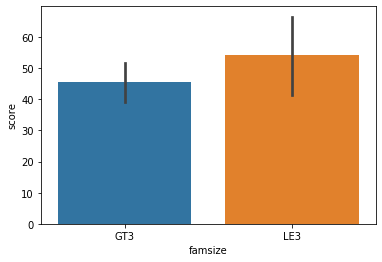

In [181]:
sns.barplot(x = 'famsize', y = 'score', data = school_GP_R)

Интересно, в другой школе у семей, где больше 3-х членов средняя успеваемость тоже ниже, чем у семей, где количество человек менее 3-х. Однако стоит заметить, что для семей, где менее 3-х членов имеется большое стандартное отклонение, что говорит нам о том, что дети сильно разбросаны по успеваемости. Также я бы отметил тот факт, что у детей из этого района с количеством членов семьи три или менее весьма большое стандартное отклонение среднего балла и в школе "MS". Это наводит на мысли о том, что, возможно, что-то пагубно влияет на учебу детей в этом районе. Так как же, все таки, учатся дети из района "U" в школе "GP", в зависимости от размеров семьи.

In [182]:
school_GP_U = school_GP[school_GP['address'] == 'U']

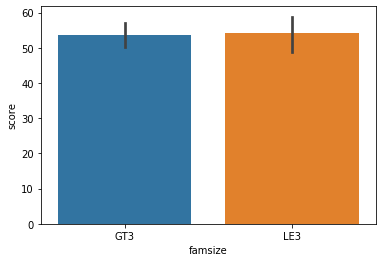

In [183]:
sns.barplot(x = 'famsize', y = 'score', data = school_GP_U)

Этот график, который показывает, что дети из района "U" учатся хорошо в не зависимости от размеров семьи в школе "GP", заставляет задуматься над тем, что с районом "R" действительно что-то не так и это требует особого внимания. На этом графике даже стоит отметить, что дети из района "U" учатся в школе "GP" тем стабильнее, чем больше семья, ведь разброс среднего для успеваемости большой семьи меньше, чем у маленькой! Наверное, старшие служат хорошим примером и помогают младшим с домашним заданием!)

Посмотрим на колонку с информацией о статусе родителей.

In [184]:
stud.loc[:,['Pstatus']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [185]:
stud['Pstatus'].value_counts()

T    314
A     36
Name: Pstatus, dtype: int64

Небольшая часть данных о совместном проживании родителей отсутствует. С этим ничего сделать нельзя и к среднему это никак не приведешь. Посмотрим, прослеживается ли какая либо связь между этой информацией и успеваемостью учеников.

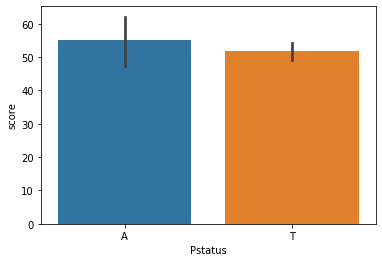

In [186]:
sns.barplot(x = 'Pstatus', y = 'score', data = stud)

На первый взгляд(если учесть уровень стандартного отклонения в семьях, где родители проживают раздельно), разницы между успеваемостью у учеников почти нет. Попробуем капнуть глубже и посмотрим как распределены значения совместного или раздельного проживания родителей в зависимости от районов.

In [187]:
stud[stud['address'] == 'R'].Pstatus.value_counts()

T    71
A     5
Name: Pstatus, dtype: int64

In [201]:
Pstatus_R_mean_score = stud[(stud['address'] == 'R')&(stud['Pstatus'] == 'A')].score.mean()
Pstatus_R_std_score = stud[(stud['address'] == 'R')&(stud['Pstatus'] == 'A')].score.std()
stud[(stud['address'] == 'R')&(stud['Pstatus'] == 'A')].score.value_counts() #Проверим успеваемость у детей, у которых родители проживают раздельно

65.0    2
50.0    1
45.0    1
75.0    1
Name: score, dtype: int64

In [202]:
Pstatus_R_mean_age = stud[(stud['address'] == 'R')&(stud['Pstatus'] == 'A')].age.mean()
stud[(stud['address'] == 'R')&(stud['Pstatus'] == 'A')].age.value_counts() #В целом, дети достаточно взрослые, чтобы эта информация могла сколь либо существенно повлиять на их успеваемость

18    2
19    1
17    1
16    1
Name: age, dtype: int64

In [198]:
Pstatus_U_mean_score = stud[(stud['address'] == 'U')&(stud['Pstatus'] == 'A')].score.mean()
Pstatus_U_std_score = stud[(stud['address'] == 'U')&(stud['Pstatus'] == 'A')].score.std()
Pstatus_U_mean_age = stud[(stud['address'] == 'U')&(stud['Pstatus'] == 'A')].age.mean()
stud[(stud['address'] == 'U')&(stud['Pstatus'] == 'A')].score.value_counts()

55.0    6
30.0    3
45.0    2
0.0     2
90.0    2
35.0    2
60.0    2
75.0    2
50.0    2
95.0    2
65.0    1
40.0    1
70.0    1
80.0    1
Name: score, dtype: int64

In [194]:
stud[(stud['address'] == 'U')&(stud['Pstatus'] == 'A')].age.value_counts()

15    9
17    7
16    7
18    3
20    2
19    1
Name: age, dtype: int64

In [206]:
print('Средняя успеваемость детей,которые проживают по адресу "U" и у которых родители живут раздельно=', round(Pstatus_U_mean_score,2))
print('Станд откл в успеваемости детей,которые проживают по адресу "U" и у которых родители живут раздельно=', round(Pstatus_U_std_score,2))
print('Средний возраст детей,которые проживают по адресу "U" и у которых родители живут раздельно=', round(Pstatus_U_mean_age,2))

Средняя успеваемость детей,которые проживают по адресу "U" и у которых родители живут раздельно= 54.31
Станд откл в успеваемости детей,которые проживают по адресу "U" и у которых родители живут раздельно= 24.38
Средний возраст детей,которые проживают по адресу "U" и у которых родители живут раздельно= 16.52


In [207]:
print('Средняя успеваемость детей,которые проживают по адресу "R" и у которых родители живут раздельно=', round(Pstatus_R_mean_score,2))
print('Станд откл в успеваемости детей,которые проживают по адресу "R" и у которых родители живут раздельно=', round(Pstatus_R_std_score,2))
print('Средний возраст детей,которые проживают по адресу "R" и у которых родители живут раздельно=', round(Pstatus_R_mean_age,2))

Средняя успеваемость детей,которые проживают по адресу "R" и у которых родители живут раздельно= 60.0
Станд откл в успеваемости детей,которые проживают по адресу "R" и у которых родители живут раздельно= 12.25
Средний возраст детей,которые проживают по адресу "R" и у которых родители живут раздельно= 17.6


Из данных, приведенных выше, можно сделать вывод о том, что чем младше дети, родители которых живут раздельно, тем хуже этот факт сказывается на их успеваемости.

Посмотрим на информацию о том, кто является опекуном совместно с информацией о проживании родителей(раздельно). (На мой взгляд, если родители живут вместе, то не имеет значения кто является опекуном)
Затем сопоставим эти данные с успеваемостью учеников.

In [26]:
stud.loc[:,['guardian']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [27]:
stud['guardian'].value_counts()

mother    250
father     86
other      28
Name: guardian, dtype: int64

In [29]:
stud_Pstatus_A = stud[stud['Pstatus'] == 'A']

In [30]:
stud_Pstatus_A.guardian.value_counts()

mother    27
other      4
father     4
Name: guardian, dtype: int64

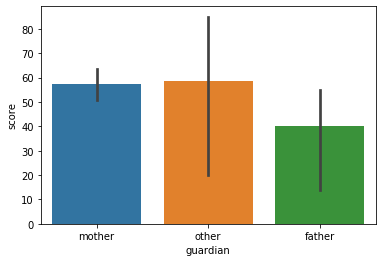

In [33]:
sns.barplot(x = 'guardian', y = 'score', data = stud_Pstatus_A)

В результате можно сделать вывод о том, что в случае раздельного проживания родителей, дети, оставшиеся с матерями, учатся стабильнее и лучше любых других возможных вариантов опекунства.

Проанализируем информацию об образовании родителей, приведенную в колонках Medu-образование матери, Fedu-образование отца.
(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [208]:
stud.loc[:,['Medu']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [209]:
stud.Medu.value_counts()

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

In [210]:
stud.loc[:,['Fedu']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [211]:
stud.Fedu.value_counts()

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

Я считаю, что образование родителей вряд ли может сильно отразиться на оценках детей. Скорее, оно отразится на работе родителей, что, в свою очередь, отразится на детях. Поэтому будем рассматривать этот параметр вместе с колонками Fjob, Mjob и колонкой об опекунстве для семей, где родители не живут вместе. (Pstatus) Но для начала, поскольку колонки Medu, Fedu числовые, очистим их от пропусков.

In [16]:
stud = stud.replace({pd.np.nan: None})

C:\Datascience\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


In [254]:
stud.loc[(stud['Fedu'].isnull()), 'Fedu'] = None #Код не сработал

In [262]:
stud.Fedu = stud.Fedu.apply(lambda x: None if x == pd.isnull(x) else x) #Код не сработал

In [14]:
stud.loc[57,['Fedu']] #Проверял, получилось ли убрать NaN

Fedu    None
Name: 57, dtype: object

In [15]:
stud.loc[:,['Fedu']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fedu    371 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [16]:
stud.loc[50:99,['Fedu']] #Проверял, получилось ли убрать NaN

,Fedu
50,2
51,2
52,2
53,4
54,3
55,1
56,3
57,None
58,None
59,2


Далее идут столбцы Mjob, Fjob.

In [18]:
stud.loc[:,['Mjob']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [19]:
stud.Mjob.value_counts()

other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

In [20]:
stud.loc[:,['Fjob']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [21]:
stud.Fjob.value_counts()

other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

Посмотрим на данные в столбцах reason (причина выбора школы), guardian (опекун мать или отец, ни тот ни другой) и проанализируем полученную информацию вместе с колонками данных об образовании родителей.

In [275]:
stud.loc[:,['reason']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [276]:
stud['reason'].value_counts()

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

Интересно, какую школу чаще всего выбирали из-за репутации, а какую из-за курса

In [279]:
stud[stud['reason'] == 'reputation'].school.value_counts()

GP    98
MS     5
Name: school, dtype: int64

Ого! Похоже, MS не блещет репутацией! А как насчет курса

In [280]:
stud[stud['reason'] == 'course'].school.value_counts()

GP    119
MS     18
Name: school, dtype: int64

Похоже, школа "MS" не пользуется популярностью. Если вспомнить уровень успеваемости, то можно предположить, что он связан со школой. По каким же причинам чаще всего выбирали школу "MS"?

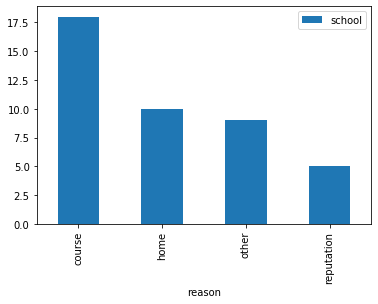

In [283]:
school_MS.pivot_table(values = 'school', 
               index = 'reason', 
               aggfunc = 'count').plot(kind = 'bar')

Кто-то все таки указывает в причинах выбора школы "MS" ее курс подготовки. Если вспомнить, что средний возраст учеников школы "MS" выше среднего возраста школы GP, то следует еще раз сравнить причину выбора школ из-за их курса, отфильтровав при этом учеников по возрасту. Для этого вспомним минимальный возраст учеников школы "MS" и построим выборку по причине = курсу и возрасту учеников.

In [288]:
school_MS.age.min()

17

In [291]:
students_under_17_reason_course = stud[(stud['age']>=17)&(stud['reason']=='course')]

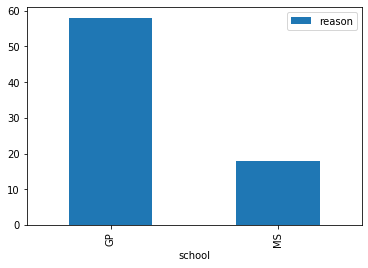

In [292]:
students_under_17_reason_course.pivot_table(values = 'reason', 
               index = 'school', 
               aggfunc = 'count').plot(kind = 'bar')

Как видно из графика, подавляющее большинство студентов старше 17 лет выбирали школу "GP" из-за ее курса. Посмотрим распределение репутации школ среди студентов старше 17.

In [293]:
students_under_17_reason_reputation = stud[(stud['age']>=17)&(stud['reason']=='reputation')]

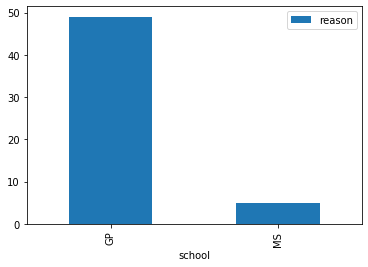

In [294]:
students_under_17_reason_reputation.pivot_table(values = 'reason', 
               index = 'school', 
               aggfunc = 'count').plot(kind = 'bar')

И снова репутация на стороне школы "GP". Проверим теорию о том, что одна школа находится в одном районе, другая-в другом. Для этого проверим причину выбора школы из-за близости расположения с информацией об адресе учеников.

In [23]:
students_under_17_reason_home = stud[(stud['age']>=17)&(stud['reason']=='home')]

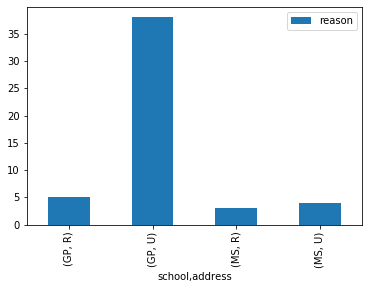

In [24]:
students_under_17_reason_home.pivot_table(values = 'reason', 
               index = ['school', 'address'], 
               aggfunc = 'count').plot(kind = 'bar')

В целом, я бы сделал вывод, что школа "GP" находится в центральной части адреса "U", а те, кто выбирал школу "MS" и при этом указал адрес проживания - "U", живут ближе к границе районов "U" и "R". То есть вывод о том, что школы находятся в разных районах, пока что, не подтвердился, но вывод о том, что школа "GP" находится в районе "U" мы сделать можем. Посмотрим на тех студентов, которые живут в "R" и на те школы, которые они выбирали по причине близости от их адреса.

In [34]:
stud[(stud['address'] == 'R')&(stud['reason'] == 'home')].school.value_counts()

GP    8
MS    3
Name: school, dtype: int64

In [35]:
stud[(stud['address'] == 'U')&(stud['reason'] == 'home')].school.value_counts() #Проверил кол-во студентов из "U", кот ездят в "MS", потому что близко и удобно

GP    81
MS     4
Name: school, dtype: int64

Видимо, в "GP" удобно добираться и из другого района, что точно говорит нам о том, что школы находятся не в разных районах. Ну или, по крайней мере, школа "MS" находится не в "U" и не в "R". Проанализируем столбцы образования родителей (Medu, Fedu).

In [37]:
stud.loc[:,['Medu']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Medu    392 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [39]:
stud.Medu.value_counts()

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

Посмотрим на цепочку образование родителей - работа - влияние на оценки учащихся. Рассмотрим эту цепочку отдельно для матерей и отцов.

In [40]:
stud_Medu_0 = stud[stud['Medu'] == 0.0] #Отфильтруем столбец образования матерей по значениям 0-4

In [41]:
stud_Medu_1 = stud[stud['Medu'] == 1.0]

In [42]:
stud_Medu_2 = stud[stud['Medu'] == 2.0]

In [45]:
stud_Medu_3 = stud[stud['Medu'] == 3.0]

In [46]:
stud_Medu_4 = stud[stud['Medu'] == 4.0]

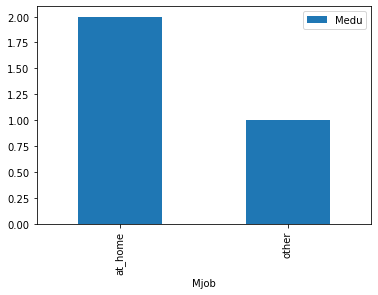

In [49]:
stud_Medu_0.pivot_table(values = 'Medu', 
               index = 'Mjob', 
               aggfunc = 'count',).plot(kind = 'bar')

Проследим сразу зависимость образование/успеваемость

In [51]:
stud_Medu_0.score.value_counts()

75.0    2
45.0    1
Name: score, dtype: int64

Посмотрим, как повлияло отсутствие образования у матери на девочек и на мальчиков.

In [53]:
stud_Medu_0[stud_Medu_0['sex'] == 'M'].score.value_counts()

75.0    1
Name: score, dtype: int64

In [54]:
stud_Medu_0[stud_Medu_0['sex'] == 'F'].score.value_counts()

75.0    1
45.0    1
Name: score, dtype: int64

Маловато данных для каких-то предположений. Проведем такой анализ для всех видов данных в столбцах с образованием

In [56]:
stud_Medu_1.score.value_counts()

50.000000    12
0.000000      9
60.000000     6
55.000000     6
40.000000     5
65.000000     4
45.000000     4
80.000000     2
35.000000     2
25.000000     2
30.000000     2
50.167598     1
55.303030     1
49.250000     1
70.000000     1
75.000000     1
Name: score, dtype: int64

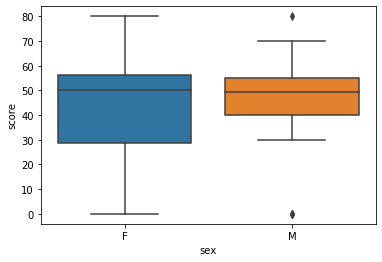

In [62]:
sns.boxplot(x = 'sex', y = 'score', data = stud_Medu_1) #Смотрим зависимость успеваемости от отсутствия образования у матери

In [65]:
stud_Medu_1_sex_M = stud_Medu_1[stud_Medu_1['sex'] == 'M'] #Переменная для обнаружения связи между образованием матери и успеваемостью сыновей
stud_Medu_1[stud_Medu_1['sex'] == 'M'].score.value_counts()#.sort_values(ascending=False)

40.00000    5
50.00000    4
0.00000     3
60.00000    3
55.00000    2
35.00000    2
45.00000    2
55.30303    1
49.25000    1
70.00000    1
30.00000    1
80.00000    1
65.00000    1
Name: score, dtype: int64

Попробуем найти связь между образованием матерей и успеваемостью детей в зависимости от их пола

In [67]:
stud_sex_M = stud[stud['sex'] == 'M'] #Возьмем только юношей

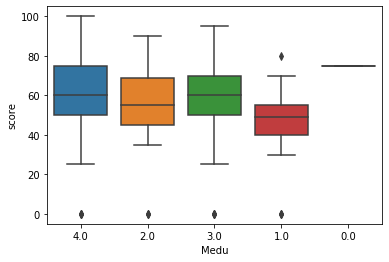

In [68]:
sns.boxplot(x = 'Medu', y = 'score', data = stud_sex_M) #Посмотрим на связь между образованием матерей и оценками мальчиков

In [69]:
stud_sex_F = stud[stud['sex'] == 'F'] #Фильтрация информации по ученицам

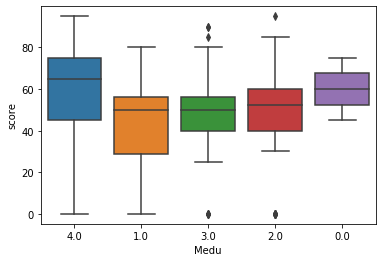

In [70]:
sns.boxplot(x = 'Medu', y = 'score', data = stud_sex_F) #Связь оценок учениц и образованием матерей

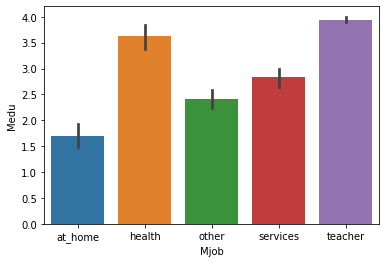

In [71]:
sns.barplot(x = 'Mjob', y = 'Medu', data = stud) #Смотрим зависимость образование - место работы матерей

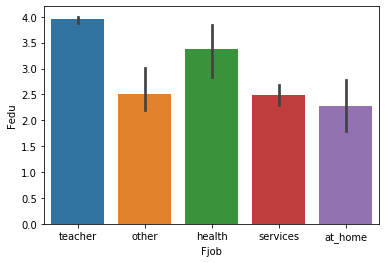

In [72]:
sns.barplot(x = 'Fjob', y = 'Fedu', data = stud) #Смотрим зависимость образование - место работы отцов

Зависимость вполне закономерна: люди с высшим или специальным образованием идут в учителя или в сферу здравоохранения (врачи). Посмотрим на успеваемость детей, если их родители имеют хорошее образование

In [88]:
teachers_health = stud[(stud['Mjob'] == 'teacher')|(stud['Mjob'] == 'health')|(stud['Fjob'] == 'teacher')|(stud['Fjob'] == 'health')]

In [89]:
teachers_health.score.mean()

56.830357142857146

Средняя оценка детей, родители которых имеют хорошее образование и хорошую работу.Посмотрим, как влияет работа учителя и работа в сфере медицины в отдельности.

In [90]:
teachers = stud[(stud['Mjob'] == 'teacher')|(stud['Fjob'] == 'teacher')]

In [91]:
health = stud[(stud['Mjob'] == 'health')|(stud['Fjob'] == 'health')]

In [92]:
teachers.score.mean()

55.342465753424655

In [93]:
health.score.mean()

58.63636363636363

Немного неожиданно, что дети тех, чьей работой является обучение детей учатся чуть хуже тех, кто работает в медицине. Чтобы судить о какой-то связи наличия образования родителей и его отсутствием, проанализируем как учатся дети родителей, у которых нет специального/высшего образования.

In [15]:
stud_Medu_Fedu_0_2 = stud[(stud['Medu'] < 3)&(stud['Fedu'] < 3)]

In [17]:
stud_Medu_Fedu_0_2.score.mean()

46.573923038061075

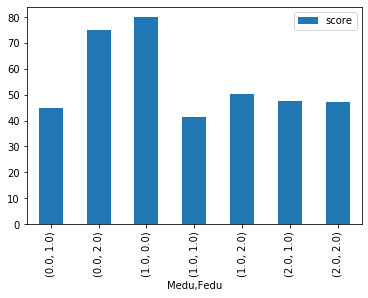

In [20]:
stud_Medu_Fedu_0_2.pivot_table(values = 'score', 
               index = ['Medu', 'Fedu'], 
               aggfunc = 'mean').plot(kind = 'bar')

Как-то подозрительно выделяются два столбца успеваемости, хотя в среднем очевиден тренд на невысокую успеваемость детей родителей, у которых нет хорошего образования. Попробуем разобраться почему такая высокая успеваемость у этих детей.

In [25]:
stud[(stud['Medu'] == 0.0)&(stud['Fedu'] == 2.0)|(stud['Medu'] == 1.0)&(stud['Fedu'] == 0.0)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
171,GP,M,16,U,GT3,T,1,0,other,other,reputation,mother,2,2,None,no,yes,yes,yes,yes,None,yes,yes,4,3,2,3,2,80
249,GP,M,16,U,GT3,T,0,2,other,other,other,mother,1,1,0,no,no,yes,no,None,yes,yes,no,4,3,2,5,0,75
324,GP,F,17,U,LE3,T,0,2,at_home,at_home,home,father,2,3,0,no,no,no,no,yes,yes,yes,no,3,3,3,2,0,75


Сложно утверждать, что показатели успеваемости этих трех студентов являются выбросами, потому что двое ребят из списка доплачивают репетиторам по математике, что, очевидно, должно положительно сказаться на их успеваемости. У девочки двое роидетей не работают и, если учесть, что время, которое она тратит на учебу, составляет 3 часа, помимо классных занятий, то, вероятно, у родителей имеется возможность контролировать ее учебу, следовательно, ее успеваемость тоже может быть оправдана этими факторами. Единственное, что выглядит странным в информации о студентке, так это причина выбора школы (близость к дому) и время, которое занимает у нее дорога (2 часа). Весьма противоречиво

Продолжим анализ оставшихся колонок

In [34]:
stud.loc[:,['traveltime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   traveltime  367 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [35]:
stud.traveltime

0      2
1      1
2      1
3      1
4      1
      ..
390    1
391    2
392    1
393    3
394    1
Name: traveltime, Length: 395, dtype: object

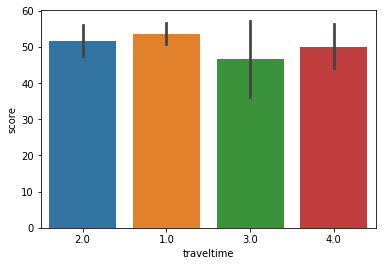

In [36]:
sns.barplot(x = 'traveltime', y = 'score', data = stud) #Смотрим влияние времени на дорогу на среднюю оценку

In [37]:
stud.traveltime.value_counts()

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

Результат вполне предсказуемый. Чем меньше ребенок тратит времени на дорогу до школы, тем больше остается свободного времени на учебу.

In [38]:
stud.loc[:,['studytime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   studytime  388 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


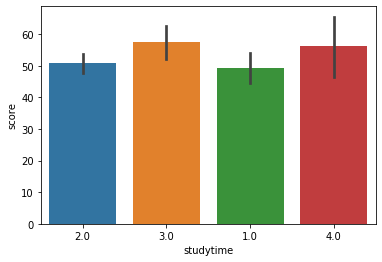

In [40]:
sns.barplot(x = 'studytime', y = 'score', data = stud)

Из данного графика можно сделать вывод о том, что оптимальное время на занятие учебой - это три часа (у детей, тратящих на учебу 4 часа слишком большое стандартное отклонение от средней оценки). Посмотрим также на возраст и на время, которое дети тратят на учебу.

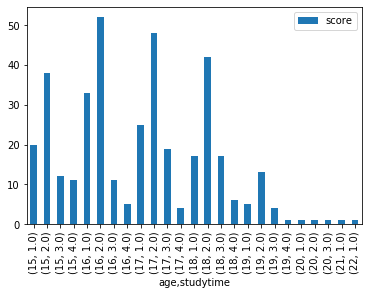

In [42]:
stud.pivot_table(values = 'score', 
               index = ['age', 'studytime'], 
               aggfunc = 'count').plot(kind = 'bar')

На этом графике явно выражена тенденция к учебе по два часа в день у студентов разных возрастов. Причем интересно заметить, что с возрастом тяга к учебе падает. Посмотрим на успеваемость по возрастам и по времени, которое тратят студенты на учебу.

In [44]:
stud_age_15_studytime_2 = stud[(stud['age'] == 15)&(stud['studytime'] == 2)] #Студенты в возрасте 15лет, которые тратят на учебу 2 часа в день
stud_age_16_studytime_2 = stud[(stud['age'] == 16)&(stud['studytime'] == 2)] #Студенты в возрасте 16лет, которые тратят на учебу 2 часа в день
stud_age_17_studytime_2 = stud[(stud['age'] == 17)&(stud['studytime'] == 2)] #Студенты в возрасте 17лет, которые тратят на учебу 2 часа в день
stud_age_18_studytime_2 = stud[(stud['age'] == 18)&(stud['studytime'] == 2)] #Студенты в возрасте 18лет, которые тратят на учебу 2 часа в день
stud_age_19_studytime_2 = stud[(stud['age'] == 19)&(stud['studytime'] == 2)] #Студенты в возрасте 19лет, которые тратят на учебу 2 часа в день

In [50]:
stud_age_15_19_studytime_2 = stud[(stud['age'] > 14)&(stud['age'] < 20)&(stud['studytime'] == 2)] #Студенты в возрасте 19лет, которые тратят на учебу 2 часа в день

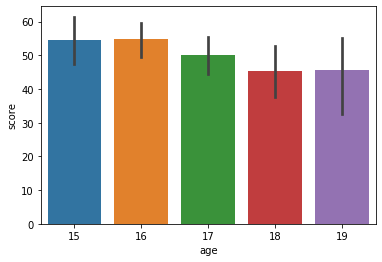

In [52]:
sns.barplot(x = 'age', y = 'score', data = stud_age_15_19_studytime_2)

График показывает как начинает не хватать по мере взросления двух часов в день на учебу. Посмотрим как меняется успеваемость в разных возрастных группах по мере увеличения затрачиваемого на учебу времени.

In [75]:
stud_age_15_19_studytime_3 = stud[(stud['age'] > 14)&(stud['age'] < 20)&(stud['studytime'] == 3)] #Студенты в возрасте 19лет, которые тратят на учебу 3 часа в день

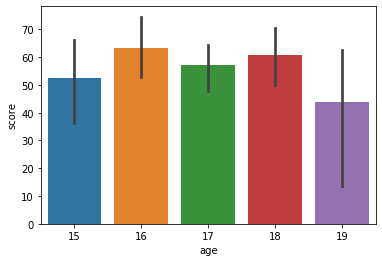

In [55]:
sns.barplot(x = 'age', y = 'score', data = stud_age_15_19_studytime_3)

Сравним успеваемость в зависимости от возраста и потраченного на учебу вреемени.

In [78]:
stud_age_15_studytime_3 = stud[(stud['age'] == 15)&(stud['studytime'] == 3)] #Студенты в возрасте 15лет, которые тратят на учебу 3 часа в день
stud_age_16_studytime_3 = stud[(stud['age'] == 16)&(stud['studytime'] == 3)] #Студенты в возрасте 16лет, которые тратят на учебу 3 часа в день
stud_age_17_studytime_3 = stud[(stud['age'] == 17)&(stud['studytime'] == 3)] #Студенты в возрасте 17лет, которые тратят на учебу 3 часа в день
stud_age_18_studytime_3 = stud[(stud['age'] == 18)&(stud['studytime'] == 3)] #Студенты в возрасте 18лет, которые тратят на учебу 3 часа в день
stud_age_19_studytime_3 = stud[(stud['age'] == 19)&(stud['studytime'] == 3)] #Студенты в возрасте 19лет, которые тратят на учебу 3 часа в день

In [77]:
stud_age_16_studytime_4 = stud[(stud['age'] == 16)&(stud['studytime'] == 4)] #Студенты в возрасте 16лет, которые тратят на учебу 4 часа в день
stud_age_17_studytime_4 = stud[(stud['age'] == 17)&(stud['studytime'] == 4)] #Студенты в возрасте 17лет, которые тратят на учебу 4 часа в день
stud_age_18_studytime_4 = stud[(stud['age'] == 18)&(stud['studytime'] == 4)] #Студенты в возрасте 18лет, которые тратят на учебу 4 часа в день
stud_age_19_studytime_4 = stud[(stud['age'] == 19)&(stud['studytime'] == 4)] #Студенты в возрасте 19лет, которые тратят на учебу 4 часа в день

In [73]:
stud_age_15_19_studytime_4 = stud[(stud['age'] > 14)&(stud['age'] < 20)&(stud['studytime'] == 4)] #Студенты в возрасте 19лет, которые тратят на учебу 3 часа в день

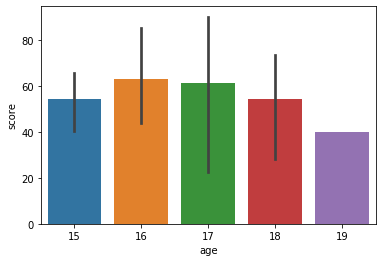

In [74]:
sns.barplot(x = 'age', y = 'score', data = stud_age_15_19_studytime_4)

In [60]:
print('Средняя успеваемость ученика в 15 лет, потратившего на учебу 2 часа', round(stud_age_15_studytime_2.score.mean()))

Средняя успеваемость ученика в 15 лет, потратившего на учебу 2 часа 55.0


In [61]:
print('Средняя успеваемость ученика в 15 лет, потратившего на учебу 3 часа', round(stud_age_15_studytime_3.score.mean()))

Средняя успеваемость ученика в 15 лет, потратившего на учебу 3 часа 52.0


In [62]:
print('Средняя успеваемость ученика в 16 лет, потратившего на учебу 2 часа', round(stud_age_16_studytime_2.score.mean()))

Средняя успеваемость ученика в 16 лет, потратившего на учебу 2 часа 55.0


In [63]:
print('Средняя успеваемость ученика в 16 лет, потратившего на учебу 3 часа', round(stud_age_16_studytime_3.score.mean()))

Средняя успеваемость ученика в 16 лет, потратившего на учебу 3 часа 63.0


In [79]:
print('Средняя успеваемость ученика в 16 лет, потратившего на учебу 4 часа', round(stud_age_16_studytime_4.score.mean()))

Средняя успеваемость ученика в 16 лет, потратившего на учебу 4 часа 63.0


In [64]:
print('Средняя успеваемость ученика в 17 лет, потратившего на учебу 2 часа', round(stud_age_17_studytime_2.score.mean()))

Средняя успеваемость ученика в 17 лет, потратившего на учебу 2 часа 50.0


In [65]:
print('Средняя успеваемость ученика в 17 лет, потратившего на учебу 3 часа', round(stud_age_17_studytime_3.score.mean()))

Средняя успеваемость ученика в 17 лет, потратившего на учебу 3 часа 57.0


In [81]:
print('Средняя успеваемость ученика в 17 лет, потратившего на учебу 4 часа', round(stud_age_17_studytime_4.score.mean()))

Средняя успеваемость ученика в 17 лет, потратившего на учебу 4 часа 61.0


In [66]:
print('Средняя успеваемость ученика в 18 лет, потратившего на учебу 2 часа', round(stud_age_18_studytime_2.score.mean()))

Средняя успеваемость ученика в 18 лет, потратившего на учебу 2 часа 45.0


In [67]:
print('Средняя успеваемость ученика в 18 лет, потратившего на учебу 3 часа', round(stud_age_18_studytime_3.score.mean()))

Средняя успеваемость ученика в 18 лет, потратившего на учебу 3 часа 61.0


In [82]:
print('Средняя успеваемость ученика в 18 лет, потратившего на учебу 4 часа', round(stud_age_18_studytime_4.score.mean()))

Средняя успеваемость ученика в 18 лет, потратившего на учебу 4 часа 54.0


In [68]:
print('Средняя успеваемость ученика в 19 лет, потратившего на учебу 2 часа', round(stud_age_19_studytime_2.score.mean()))

Средняя успеваемость ученика в 19 лет, потратившего на учебу 2 часа 46.0


In [69]:
print('Средняя успеваемость ученика в 19 лет, потратившего на учебу 3 часа', round(stud_age_19_studytime_3.score.mean()))

Средняя успеваемость ученика в 19 лет, потратившего на учебу 3 часа 44.0


In [83]:
print('Средняя успеваемость ученика в 19 лет, потратившего на учебу 4 часа', round(stud_age_19_studytime_4.score.mean()))

Средняя успеваемость ученика в 19 лет, потратившего на учебу 4 часа 40.0


Из графиков и числовых данных мы видим, что эффективное время, уделяемое занятиям в возрасте 15-и лет в размере 2 часов в день может быть достаточным, тогда как по мере взросления ребенка и усложнения программы, эффективное время, потраченное на занятия, растет.

Продолжим анализ данных. Посмотрим на столбец failures.

In [84]:
stud.failures.value_counts()

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

Из описания столбца не совсем ясно какую смысловую нагрузку вкладывали авторы опроса в формулировку "Количество внеучебных неудач". Попробуем проследить взаимосвязь с оценками у столбцов, где значение этого показателя положительно.

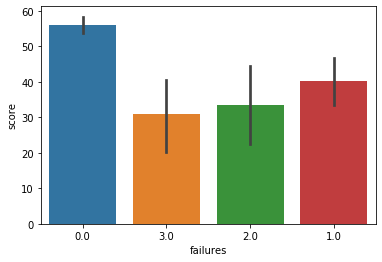

In [86]:
sns.barplot(x = 'failures', y = 'score', data = stud)

Этот показатель оказывает существенное влияние на успеваемость учеников. Попробуем разобраться что означает фраза "внеучебные неудачи". Попробуем установаить связь внеучебных неудач и столбцов: отношения в семье(famrel), проведение времени с друзьями(goout), здоровье (health), наличие или отсутствие романтических отношений (romantic), статус совместного жилья родителей(Pstatus)

In [90]:
stud_failures = stud[stud['failures'] > 0]
stud_failures

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,None,no,yes,yes,yes,None,4,3,2,3,10,50
18,GP,M,17,U,GT3,T,3,2,services,services,course,mother,1,1,3,no,yes,None,yes,yes,yes,yes,no,5,5,5,5,16,25
25,GP,F,16,U,GT3,None,2,2,services,services,home,mother,1,1,2,no,yes,yes,no,no,yes,yes,no,-1,2,2,5,14,40
40,GP,F,16,U,LE3,T,2,2,other,other,home,mother,2,2,1,no,None,no,yes,no,yes,yes,yes,3,3,3,3,25,55
44,GP,F,16,U,LE3,T,2,2,other,None,course,father,2,2,1,yes,no,no,None,yes,yes,yes,no,4,3,3,5,14,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,MS,M,18,R,GT3,T,4,2,other,None,home,father,None,1,1,no,no,None,no,yes,yes,None,no,5,4,3,3,14,25
387,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,5,0,0
389,MS,F,18,U,GT3,T,1,1,other,other,course,mother,None,2,1,no,no,no,yes,yes,yes,None,no,1,1,1,5,0,0
390,MS,M,20,U,LE3,A,2,2,services,services,course,None,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,212,45


Начнем анализировать внеучебные неудачи с отношений в семье.

In [93]:
stud_failures.famrel.value_counts()

 4.0    41
 5.0    17
 3.0    10
 2.0     4
-1.0     1
 1.0     1
Name: famrel, dtype: int64

У 8% из списка плохие отношения в семье. Посмотрим на их успеваемость.

In [99]:
stud_failures_famrel = stud_failures[stud_failures['famrel'] < 3.0]
stud_failures_famrel

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,None,2,2,services,services,home,mother,1,1,2,no,yes,yes,no,no,yes,yes,no,-1,2,2,5,14,40
141,GP,M,16,U,LE3,T,2,2,services,services,reputation,father,2,1,2,no,yes,no,None,yes,yes,None,no,2,3,3,2,8,45
150,GP,M,18,U,LE3,T,1,1,other,other,course,mother,1,1,3,no,no,no,no,yes,no,yes,yes,2,3,5,4,None,0
206,GP,F,16,U,GT3,A,3,1,services,other,course,mother,1,2,3,no,yes,yes,no,yes,yes,yes,no,2,3,3,4,5,35
278,GP,F,18,U,GT3,T,4,4,health,health,reputation,father,1,2,1,yes,yes,no,yes,yes,yes,yes,yes,2,4,4,4,15,40
389,MS,F,18,U,GT3,T,1,1,other,other,course,mother,None,2,1,no,no,no,yes,yes,yes,None,no,1,1,1,5,0,0


Успеваемость у этих студентов действительно плохая...Глядя на родителей этих студентов, на их образование, место работы и на отношения с детьми, я бы сделал вывод, что не всегда родители являются главной причиной неуспеваемости детей по математике...Из выборки выше видно, что у 4-х студентов из 6 есть серьезное количество пропусков занятий. Интересно, что послужило причиной отсутствия каких-либо данных по экзамену по математике у студента из школы "MS"?

In [101]:
school_MS.traveltime.value_counts()

2.0    20
1.0    13
3.0     8
4.0     1
Name: traveltime, dtype: int64

In [112]:
school_MS.loc[:,['traveltime']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 349 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  42 non-null     float64
dtypes: float64(1)
memory usage: 736.0 bytes


In [114]:
school_MS.traveltime.mean()

1.9285714285714286

In [116]:
school_MS.traveltime.std()

0.7775150266874192

In [115]:
school_GP.traveltime.mean()

1.3753846153846154

In [117]:
school_GP.traveltime.std()

0.6578187790409149

Интересное наблюдение, до школы "MS" добираться в среднем дольше чем до "GP". Продолжим анализировать внеучебные неудачи. Посмотрим на связь этого показателя с временем, которое эти дети проводят с друзьями.

In [122]:
stud_failures.goout.value_counts()

4.0    22
3.0    19
2.0    17
5.0    15
1.0     5
Name: goout, dtype: int64

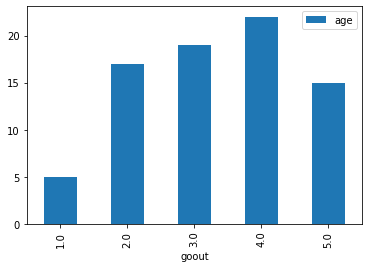

In [124]:
stud_failures.pivot_table(values = 'age', 
               index = 'goout', 
               aggfunc = 'count').plot(kind = 'bar')

In [134]:
stud_failures

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,None,no,yes,yes,yes,None,4,3,2,3,10,50
18,GP,M,17,U,GT3,T,3,2,services,services,course,mother,1,1,3,no,yes,None,yes,yes,yes,yes,no,5,5,5,5,16,25
25,GP,F,16,U,GT3,None,2,2,services,services,home,mother,1,1,2,no,yes,yes,no,no,yes,yes,no,-1,2,2,5,14,40
40,GP,F,16,U,LE3,T,2,2,other,other,home,mother,2,2,1,no,None,no,yes,no,yes,yes,yes,3,3,3,3,25,55
44,GP,F,16,U,LE3,T,2,2,other,None,course,father,2,2,1,yes,no,no,None,yes,yes,yes,no,4,3,3,5,14,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,MS,M,18,R,GT3,T,4,2,other,None,home,father,None,1,1,no,no,None,no,yes,yes,None,no,5,4,3,3,14,25
387,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,5,0,0
389,MS,F,18,U,GT3,T,1,1,other,other,course,mother,None,2,1,no,no,no,yes,yes,yes,None,no,1,1,1,5,0,0
390,MS,M,20,U,LE3,A,2,2,services,services,course,None,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,212,45


In [139]:
stud_failures[stud_failures['goout'] > 3].count()

school        37
sex           37
age           37
address       33
famsize       36
Pstatus       32
Medu          36
Fedu          32
Mjob          37
Fjob          31
reason        36
guardian      30
traveltime    35
studytime     37
failures      37
schoolsup     36
famsup        35
paid          35
activities    37
nursery       34
higher        34
internet      31
romantic      35
famrel        33
freetime      37
goout         37
health        36
absences      35
score         37
dtype: int64

Сравним эти значения с остальным списком студентов

In [126]:
stud_failures_0_goout_1_5 = stud[(stud['failures'] == 0)&(stud['goout'] > 0)]

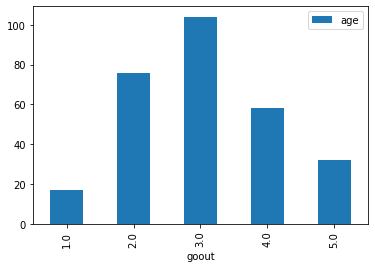

In [127]:
stud_failures_0_goout_1_5.pivot_table(values = 'age', 
               index = 'goout', 
               aggfunc = 'count').plot(kind = 'bar')

In [130]:
stud_failures_0_goout_1_5

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,None,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,None,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,MS,F,18,R,GT3,T,4.0,4.0,teacher,at_home,reputation,mother,3.0,1.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,4.0,4.0,3.0,5.0,7.0,30.0
388,MS,F,18,U,LE3,T,3.0,1.0,teacher,services,course,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,None,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [140]:
stud_failures_0_goout_1_5[stud_failures_0_goout_1_5['goout'] > 3.0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,None,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
6,GP,M,16,None,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
15,GP,F,16,U,GT3,None,4.0,4.0,health,other,home,mother,1.0,1.0,0.0,no,yes,no,no,yes,yes,yes,no,4.0,4.0,4.0,2.0,4.0,70.0
23,GP,M,16,U,LE3,T,2.0,2.0,other,other,reputation,mother,2.0,2.0,0.0,no,yes,no,yes,yes,yes,yes,no,5.0,4.0,4.0,5.0,0.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,MS,F,18,R,LE3,T,4.0,NaN,other,None,reputation,mother,2.0,3.0,0.0,no,no,no,no,yes,yes,yes,no,5.0,4.0,4.0,1.0,0.0,95.0
379,MS,F,17,R,GT3,T,3.0,1.0,at_home,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,no,yes,yes,no,4.0,5.0,4.0,1.0,17.0,50.0
380,MS,M,18,U,GT3,T,4.0,4.0,teacher,teacher,home,father,1.0,2.0,0.0,no,no,yes,yes,no,yes,yes,None,3.0,2.0,4.0,2.0,4.0,70.0
388,MS,F,18,U,LE3,T,3.0,1.0,teacher,services,course,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0


In [132]:
print('Соотношение между студентами, гуляющими более 2 часов в день с друзьями в отсутствии "внеучебных неудач" =', round(194/287,2))

Соотношение между студентами, гуляющими более 2 часов в день с друзьями в отсутствии "внеучебных неудач" = 0.68


In [141]:
print('Соотношение между студентами, гуляющими более 3 часов в день с друзьями в отсутствии "внеучебных неудач" =', round(90/287,2))

Соотношение между студентами, гуляющими более 3 часов в день с друзьями в отсутствии "внеучебных неудач" = 0.31


In [137]:
print('Соотношение между студентами, гуляющими более 2 часов в день с друзьями при наличии "внеучебных неудач" =', round(56/80,2))

Соотношение между студентами, гуляющими более 2 часов в день с друзьями при наличии "внеучебных неудач" = 0.7


In [142]:
print('Соотношение между студентами, гуляющими более 3 часов в день с друзьями при наличии "внеучебных неудач" =', round(37/80,2))

Соотношение между студентами, гуляющими более 3 часов в день с друзьями при наличии "внеучебных неудач" = 0.46


Из графиков выше и соотношений времени, затрачиваемого студентами на прогулки после учебы, видно, что студенты, у которых имеется положительное значение в столбце "внеучебных неудач" чаще проводят время на улице с друзьями. Проверим есть ли связь между здоровьем и "внеучебными неудачами".

In [143]:
stud_failures.health.value_counts()

5.0    35
3.0    21
4.0    11
2.0     7
1.0     4
Name: health, dtype: int64

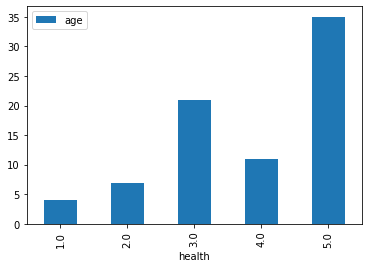

In [144]:
stud_failures.pivot_table(values = 'age', 
               index = 'health', 
               aggfunc = 'count').plot(kind = 'bar')

Большая часть студентов из списка тех, кто имеет "внеучебные неудачи" имеет неплохое здоровье. Посмотрим на колонку "romantic" и проследим связь с "внеучебными неудачами"

In [145]:
stud_failures.romantic.value_counts()

no     42
yes    33
Name: romantic, dtype: int64

Сравним соотношение студентов в отношениях и без в выборке, где студенты отметили положительные значения в столбце "Внеучебные неудачи", со студентами в оставшейся выборке.

In [146]:
stud[stud['failures'] == 0].romantic.value_counts()

no     187
yes     84
Name: romantic, dtype: int64

Студентов, которые находятся в отношениях среди тех, кто отметил наличие "Внеучебных неудач", явно больше чем среди тех, кто отметил отсутствие таковых. Осталось посмотреть взаимосвязь между студентами с наличием "внеучебных неудач" и колонки совместного проживания родителей.

In [147]:
stud_failures.Pstatus.value_counts()

T    66
A     7
Name: Pstatus, dtype: int64

In [148]:
stud.Pstatus.value_counts()

T    314
A     36
Name: Pstatus, dtype: int64

Похоже, что совместное/раздельное проживание родителей не имеет прямого отношения к показателю "Внеучебных неудач"

Из всех анализируемых совместно с показателем "Внеучебных неудач" колонок, особое внимание стоит обратить на колонку пропусков занятий(absences), наличие/отсутствие романтических отношений (romantic), время, затрачиваемое студентом на прогулки с друзьями(goout). Еще надо проанализировать прямую зависимость колонки здоровья (health) на колонку результатов. Начнем по-порядку с колонки отсутствия на занятиях (absences).

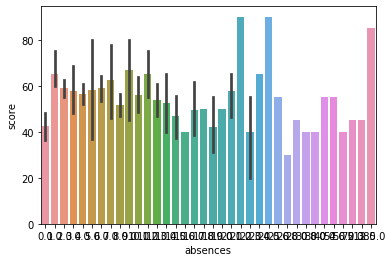

In [150]:
sns.barplot(x = 'absences', y = 'score', data = stud)

Очевидно, такой график имеет не очень ясное отображение. Попробуем его оптимизировать.

In [158]:
stud_absences_less_5 = stud[stud['absences'] < 5] #Посмотрим на успеваемость студентов, у которых менее 5 пропусков

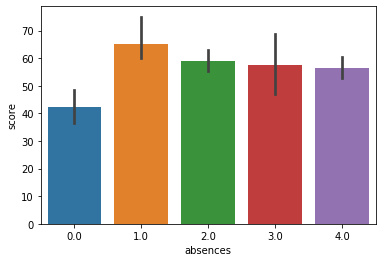

In [152]:
sns.barplot(x = 'absences', y = 'score', data = stud_absences_less_5)

In [156]:
print('Средняя успеваемость всех студентов с количеством пропусков менее 5 =', stud_absences_less_5.score.mean(),
      '\nСтандартное отклонение успеваемости таких студентов', stud_absences_less_5.score.std())

Средняя успеваемость всех студентов с количеством пропусков менее 5 = 50.59846053546279 
Стандартное отклонение успеваемости таких студентов 25.7344270294086


In [162]:
stud_absences_more_5_less_10 = stud[(stud['absences'] >= 5)&(stud['absences'] < 10)] #Посмотрим на успеваемость студентов, у которых от 5(вкл) до 10 пропусков

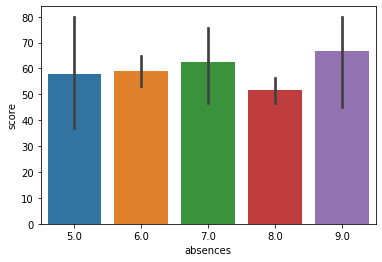

In [160]:
sns.barplot(x = 'absences', y = 'score', data = stud_absences_more_5_less_10)

In [161]:
print('Средняя успеваемость всех студентов с количеством пропусков больше 5"вкл", но меньше 10 =', stud_absences_more_5_less_10.score.mean(),
      '\nСтандартное отклонение успеваемости таких студентов', stud_absences_more_5_less_10.score.std())

Средняя успеваемость всех студентов с количеством пропусков больше 5"вкл", но меньше 10 = 57.18814542068732 
Стандартное отклонение успеваемости таких студентов 16.601857127877814


In [163]:
stud_absences_more_10 = stud[stud['absences'] >= 10] #Студенты у которых больше 10 пропусков

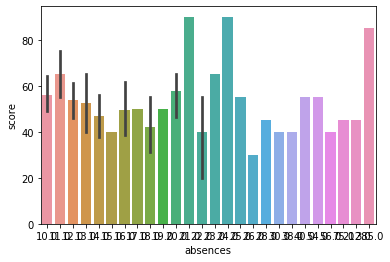

In [164]:
sns.barplot(x = 'absences', y = 'score', data = stud_absences_more_10)

Давайте посмотрим на тех, чья успеваемость по математике больше 80, у которых при этом более 10 пропусков! Такие результаты впечатляют...Возможно, эти дети много болеют, но при этом все свободное время занимаются из дома (проверим и эту версию)

In [165]:
stud_score_80_absences_more_10 = stud[(stud['score'] > 80)&(stud['absences'] > 10)]

In [166]:
stud_score_80_absences_more_10

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
198,GP,F,17,U,GT3,None,4.0,4.0,services,teacher,home,mother,2.0,1.0,1.0,no,yes,no,no,yes,yes,None,no,4.0,2.0,4.0,2.0,24.0,90.0
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,None,no,no,yes,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
260,GP,F,18,U,GT3,None,4.0,3.0,None,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,yes,3.0,1.0,2.0,2.0,21.0,90.0


Весьма интересная выборка. Здесь весьма много примечательой информации...Начнем с того, что все три студента - девушки. У 5 из 6-х родителей имеется либо специальное либо высшее образование. Отношения в семье (famrel) у всех трех разное (от очень хорошего, до негативного). Однако, что еще объединяет студентов этой выборки (помимо пола) - это показатель их здоровья. У всех трех оно на уровне не выше 3-х, что, потенциально, может объяснять их отсутствие на занятиях. Посмотрим на средний показатель уровня здоровья тех, кто пропускал занятия более 10 раз.

In [167]:
stud_absences_more_10.health.mean()

3.475

In [168]:
stud_absences_more_10.health.std()

1.3684972817388354

In [169]:
stud_absences_more_10.health.median()

3.0

Эти три коэффициента говорят нам о том, что средний уровень показателя здоровья ниже 4. Посмотрим на среднее время, проведенное с друзьями у тех, кто пропускает часто занятия. Сравним его для двух групп студентов. Для первой группы, где студенты пропускали от 5 до 10 занятий, и для второй, где величина пропусков больше 10.

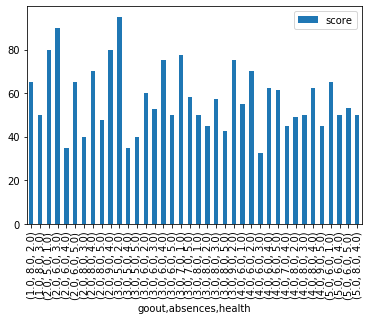

In [171]:
stud_absences_more_5_less_10.pivot_table(values = 'score', 
               index = ['goout','absences','health'], 
               aggfunc = 'mean').plot(kind = 'bar')

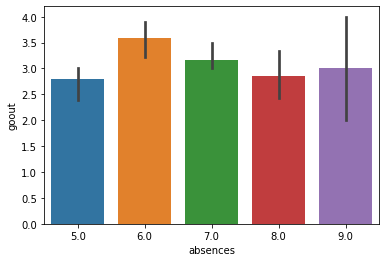

In [172]:
sns.barplot(x = 'absences', y = 'goout', data = stud_absences_more_5_less_10)

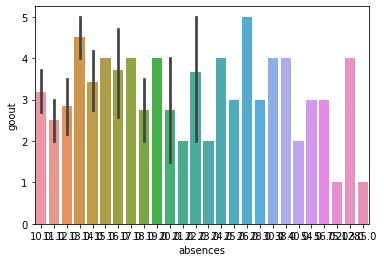

In [173]:
sns.barplot(x = 'absences', y = 'goout', data = stud_absences_more_10)

Большое количество времени на улице с друзьями проводят студенты с значением 26 в столбце absences. сделаем срез по ним и посмотрим на их успеваемость и показатели здоровья.

In [174]:
stud_absences_26 = stud[(stud['absences'] == 26)]
stud_absences_26

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
103,GP,F,15,U,GT3,T,3.0,2.0,services,other,home,mother,2.0,2.0,0.0,yes,yes,yes,no,yes,yes,yes,no,4.0,3.0,5.0,2.0,26.0,30.0


Это всего одна ученица...Предлагаю проверить остальных студентов с большим числом пропусков и с временем, проведенным на улице с друзьями (для конкретики, возьмем всех, кто проводит на улице с друзьями 3 и более часов в день)

In [175]:
studstud_absences_more_10_goout_3 = stud_absences_more_10[stud_absences_more_10['goout'] >= 3]
studstud_absences_more_10_goout_3

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
18,GP,M,17,U,GT3,T,3.0,2.0,services,services,course,mother,1.0,1.0,3.0,no,yes,None,yes,yes,yes,yes,no,5.0,5.0,5.0,5.0,16.0,25.0
29,GP,M,16,U,GT3,T,4.0,4.0,None,teacher,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,4.0,4.0,5.0,5.0,16.0,55.0
40,GP,F,16,U,LE3,T,2.0,2.0,other,other,home,mother,2.0,2.0,1.0,no,None,no,yes,no,yes,yes,yes,3.0,3.0,3.0,3.0,25.0,55.0
44,GP,F,16,U,LE3,T,2.0,2.0,other,None,course,father,2.0,2.0,1.0,yes,no,no,None,yes,yes,yes,no,4.0,3.0,3.0,5.0,14.0,45.0
46,GP,F,16,U,LE3,A,3.0,NaN,other,services,home,mother,1.0,2.0,0.0,no,yes,no,no,yes,yes,yes,no,2.0,3.0,5.0,3.0,12.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,MS,M,18,R,GT3,T,3.0,NaN,other,other,course,None,2.0,1.0,1.0,no,yes,no,no,no,yes,yes,no,NaN,5.0,5.0,5.0,10.0,65.0
373,MS,F,17,R,GT3,T,1.0,2.0,other,None,None,mother,1.0,1.0,0.0,no,no,no,yes,yes,yes,yes,None,NaN,5.0,5.0,1.0,14.0,25.0
379,MS,F,17,R,GT3,T,3.0,1.0,at_home,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,no,yes,yes,no,4.0,5.0,4.0,1.0,17.0,50.0
384,MS,M,18,R,GT3,T,4.0,2.0,other,None,home,father,NaN,1.0,1.0,no,no,None,no,yes,yes,None,no,5.0,4.0,3.0,3.0,14.0,25.0


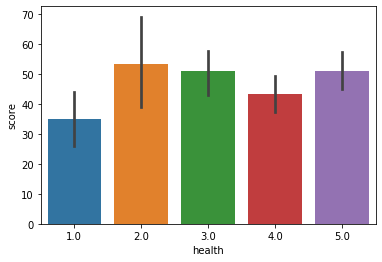

In [176]:
sns.barplot(x = 'health', y = 'score', data = studstud_absences_more_10_goout_3)

Выделяются студенты с оценкой здоровья ниже 3-х. Посмотрим на них детальнее.

In [177]:
studstud_absences_more_10_goout_3[studstud_absences_more_10_goout_3.health < 3.0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
103,GP,F,15,U,GT3,T,3.0,2.0,services,other,home,mother,2.0,2.0,0.0,yes,yes,yes,no,yes,yes,yes,no,4.0,3.0,5.0,2.0,26.0,30.0
183,GP,F,17,U,LE3,None,3.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,no,yes,no,yes,yes,yes,yes,yes,5.0,3.0,3.0,1.0,56.0,40.0
190,GP,F,16,U,GT3,T,2.0,3.0,services,services,course,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,None,4.0,3.0,3.0,2.0,10.0,65.0
198,GP,F,17,U,GT3,None,4.0,4.0,services,teacher,home,mother,2.0,1.0,1.0,no,yes,no,no,yes,yes,None,no,4.0,2.0,4.0,2.0,24.0,90.0
216,GP,F,17,U,GT3,T,4.0,3.0,other,None,reputation,mother,1.0,2.0,2.0,no,no,yes,no,yes,yes,yes,yes,3.0,4.0,5.0,1.0,22.0,20.0
232,GP,M,17,U,GT3,T,4.0,NaN,teacher,teacher,reputation,mother,1.0,2.0,0.0,yes,None,no,yes,yes,yes,yes,yes,4.0,5.0,5.0,2.0,14.0,45.0
235,GP,M,16,U,None,T,3.0,2.0,at_home,other,reputation,None,2.0,3.0,0.0,no,no,no,yes,yes,yes,yes,yes,5.0,3.0,3.0,2.0,10.0,50.0
247,GP,M,22,U,GT3,T,3.0,1.0,services,services,other,mother,1.0,1.0,3.0,no,no,no,no,no,no,yes,yes,5.0,4.0,5.0,1.0,16.0,40.0
297,GP,F,18,U,LE3,T,4.0,3.0,other,other,home,other,2.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,yes,4.0,4.0,5.0,2.0,10.0,40.0
373,MS,F,17,R,GT3,T,1.0,2.0,other,None,None,mother,1.0,1.0,0.0,no,no,no,yes,yes,yes,yes,None,NaN,5.0,5.0,1.0,14.0,25.0


И снова интересная выборка. 8 студентов в выборке - девушки. 6 из них находятся в отношениях. У всех плохие показатели здоровья и только 4 из 11 набрали больше 50 баллов за тест по математике. При этом те, кто набрал больше других - все, кроме одного мальчика, не состоят в отношениях. Также занятно то, что из всех школьников, которые набрали больше баллов по тесту - не платили за дополнительные занятия. Тут важно отметить следующие наблюдения: интересно,из всего числа студентов сколько тех, кто в отношениях, прогуливают занятия и при этом имеют большое значение по проведенному времени с друзьями. Давайте выясним это.

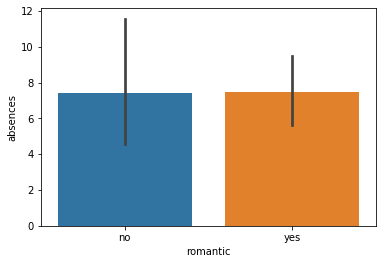

In [181]:
sns.barplot(x = 'romantic', y = 'absences', data = stud)

Интересное наблюдение...Выходит, что те, кто состоит в отношениях, в целом, имеет более стабильную посещаемость, за счет меньшего показателя стандартного отклонения. Посмотрим взаимосвязь столбцов прогулок с друзьями и отсутствия на занятиях.

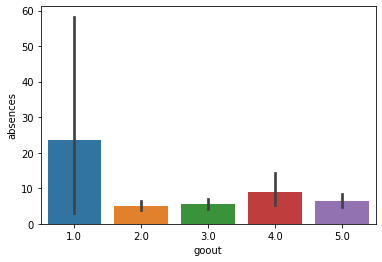

In [182]:
sns.barplot(x = 'goout', y = 'absences', data = stud)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
9,GP,M,15,U,None,None,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0
20,GP,M,15,U,GT3,T,4.0,3.0,teacher,other,reputation,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,NaN,4.0,1.0,1.0,0.0,75.0
22,GP,M,16,U,LE3,T,4.0,2.0,teacher,None,course,mother,1.0,2.0,0.0,no,None,no,yes,None,yes,yes,no,4.0,5.0,1.0,5.0,2.0,80.0
31,GP,M,15,U,GT3,T,4.0,4.0,services,None,reputation,mother,2.0,2.0,0.0,no,yes,None,yes,yes,yes,yes,no,4.0,3.0,1.0,5.0,0.0,85.0
35,GP,F,15,U,GT3,T,2.0,3.0,other,other,other,father,NaN,1.0,0.0,None,yes,no,yes,yes,yes,no,no,3.0,5.0,1.0,5.0,0.0,30.0
39,GP,F,15,R,GT3,T,2.0,2.0,at_home,other,reputation,mother,1.0,1.0,0.0,yes,yes,yes,yes,yes,yes,no,no,4.0,3.0,1.0,2.0,8.0,65.0
43,GP,M,15,U,GT3,T,2.0,2.0,services,services,course,father,1.0,1.0,0.0,yes,yes,no,None,yes,yes,yes,no,NaN,4.0,1.0,1.0,0.0,55.0
78,GP,M,17,U,None,T,2.0,1.0,other,other,home,mother,2.0,1.0,3.0,yes,None,no,yes,yes,no,yes,no,4.0,5.0,1.0,3.0,2.0,50.0
133,GP,F,16,U,GT3,A,3.0,4.0,services,other,course,father,1.0,1.0,0.0,no,no,no,no,yes,yes,None,no,3.0,2.0,1.0,5.0,16.0,55.0
152,GP,F,15,R,GT3,T,3.0,3.0,services,None,reputation,other,2.0,3.0,2.0,no,yes,yes,yes,None,yes,yes,yes,4.0,2.0,1.0,3.0,8.0,50.0


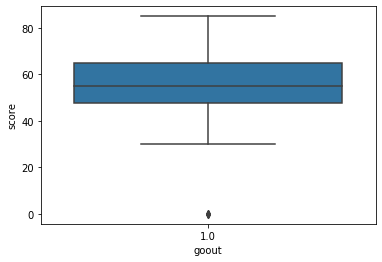

In [190]:
display(stud[stud['goout'] == 1.0])
stud_goout_1 = stud[stud['goout'] == 1.0]
sns.boxplot(x = 'goout', y = 'score', data = stud_goout_1)

In [191]:
stud_goout_1.romantic.value_counts()

no     16
yes     7
Name: romantic, dtype: int64

In [196]:
stud_goout_1[stud_goout_1['romantic'] == 'yes'].score.value_counts()
stud_goout_1[stud_goout_1['romantic'] == 'yes'].score.mean()

31.428571428571427

In [197]:
stud_romantic_yes = stud[stud['romantic'] == 'yes']

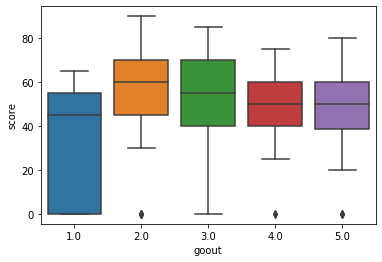

In [198]:
sns.boxplot(x = 'goout', y = 'score', data = stud_romantic_yes)

Похоже, что студенты, которые выходят на улицу для общения и которые находятся в отношениях учатся лучше тех, кто встречается по интернету...Посмотрим, кстати, у скольких из них есть интернет (из тех, кто гуляет до часу в день и находится в романтических отношениях.

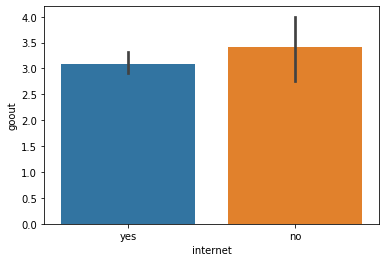

In [199]:
sns.barplot(x = 'internet', y = 'goout', data = stud_romantic_yes)

Закономерность предсказуема. Те, у кого дома нет интернета и у кого есть отношения, стремятся выйти на улицу. Посмотрим как это связано с успеваемостью

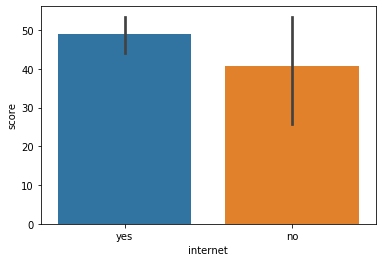

In [200]:
sns.barplot(x = 'internet', y = 'score', data = stud_romantic_yes)

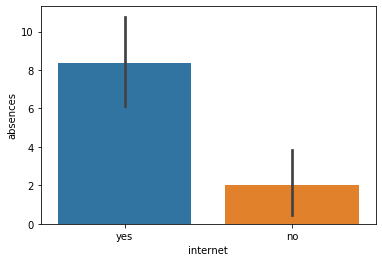

In [202]:
sns.barplot(x = 'internet', y = 'absences', data = stud_romantic_yes)

Интересная зависимость. Те, кто находится в отношениях, но у кого дома нет интернета: реже прогуливают, больше времени проводят на улице и хуже учатся чем те, у кого есть интернет, отношения и кто меньше времени проводит на улице. Посмотрим на обратную сторону выборки, а точнее посмотрим на тех, кто не состоит в отношениях и проведем точно такие же исследования среди них.

In [203]:
stud_romantic_no = stud[stud['romantic'] == 'no']

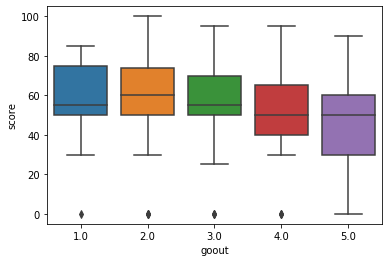

In [204]:
sns.boxplot(x = 'goout', y = 'score', data = stud_romantic_no)

Если сравнивать с аналогичным графиком, где студенты находились в отношениях, то можно прийти к выводу, что если у тех студентов, кто находится в отношениях, не получается видеться - это плохо отражается на учебе. В остальном динамика схожа у обоих графиков, а именно: чем больше времени студенты проводят на улице а не за учебой, тем больше страдает их успеваемость.

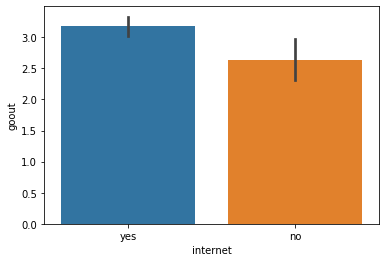

In [205]:
sns.barplot(x = 'internet', y = 'goout', data = stud_romantic_no)

Странно...Те, у кого нет интернета заметно меньше времени проводят на улице. Посмотрим на их успеваемость.

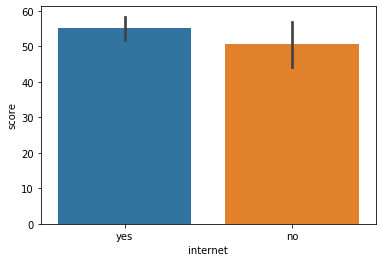

In [206]:
sns.barplot(x = 'internet', y = 'score', data = stud_romantic_no)

Наличие интернета благотворно влияет на среднюю оценку и для студентов в отношениях и для студентов, не находящихся в романтических отношениях. Из этого можно сделать вывод о том, что, в целом, отношения негативно сказываются на учебе, а наличие интернета - позитивно.

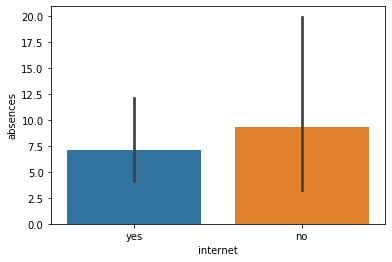

In [207]:
sns.barplot(x = 'internet', y = 'absences', data = stud_romantic_no)

Из этой зависимости можно сделать вывод, что пропуски студентов на сильно зависят от наличия/отсутствия отношений или интернета у студентов. Может быть, отсутствие на занятиях скорее связано со здоровьем? Проверим.

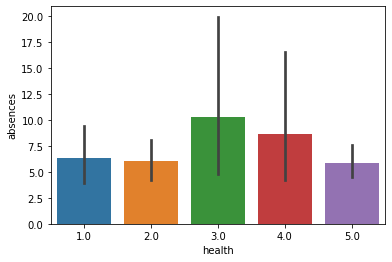

In [208]:
sns.barplot(x = 'health', y = 'absences', data = stud)

Интересно...Студенты чаще начинают пропускать занятия при средних показаниях здоровья. Посмотрим на успеваемость студентов в сравнении с их показаниями здоровья.

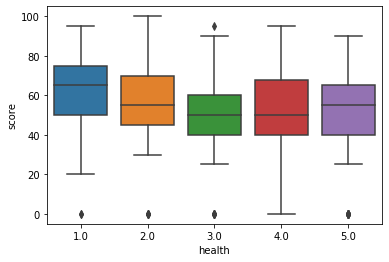

In [230]:
sns.boxplot(x = 'health', y = 'score', data = stud)

Выходит, что, в среднем, те, кто имеет проблемы со здоровьем, учатся лучше здоровых, имеют меньше пропусков занятий. Посмотрим на таких студентов по-внимательнее.

In [234]:
stud[stud['health'] == 1.0].describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
count,47.000000,47.000000,46.000000,46.000000,46.000000,43.000000,43.000000,46.000000,46.000000,47.0,44.000000,47.000000
mean,16.574468,2.957447,2.500000,1.413043,2.021739,0.162791,3.813953,3.217391,3.152174,1.0,6.363636,59.361702
std,1.485359,1.102516,1.090362,0.685601,0.802472,0.574466,1.219989,1.093680,1.173170,0.0,9.671562,21.759981
min,15.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000
25%,15.000000,2.000000,2.000000,1.000000,2.000000,0.000000,3.000000,2.250000,2.000000,1.0,0.000000,50.000000
50%,17.000000,3.000000,2.500000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.0,4.000000,65.000000
75%,17.500000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,1.0,7.250000,75.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,1.0,56.000000,95.000000


In [13]:
stud[stud['health'] == 1.0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
20,GP,M,15,U,GT3,T,4.0,3.0,teacher,other,reputation,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,NaN,4.0,1.0,1.0,0.0,75.0
27,GP,M,15,U,GT3,T,4.0,2.0,health,services,other,mother,1.0,1.0,0.0,NaN,no,yes,no,yes,yes,yes,NaN,2.0,2.0,4.0,1.0,4.0,75.0
43,GP,M,15,U,GT3,T,2.0,2.0,services,services,course,father,1.0,1.0,0.0,yes,yes,no,NaN,yes,yes,yes,no,NaN,4.0,1.0,1.0,0.0,55.0
54,GP,F,15,U,LE3,NaN,3.0,3.0,NaN,other,other,mother,1.0,1.0,NaN,no,no,yes,NaN,yes,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
56,GP,F,15,U,GT3,A,4.0,3.0,services,services,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,4.0,3.0,2.0,1.0,0.0,75.0
62,GP,F,16,U,LE3,T,1.0,2.0,other,services,reputation,father,1.0,2.0,0.0,yes,no,no,yes,yes,yes,yes,no,4.0,4.0,3.0,1.0,4.0,45.0
65,GP,F,16,U,LE3,T,4.0,3.0,teacher,services,course,mother,3.0,2.0,0.0,no,yes,no,yes,yes,yes,NaN,no,5.0,4.0,3.0,1.0,2.0,75.0
76,GP,M,15,U,NaN,T,4.0,0.0,teacher,other,course,mother,2.0,4.0,0.0,no,no,no,yes,yes,NaN,yes,no,3.0,4.0,3.0,1.0,8.0,50.0


In [235]:
stud[stud['health'] == 1.0].sex.value_counts()

F    31
M    16
Name: sex, dtype: int64

In [236]:
stud[stud['health'] == 1.0].famsize.value_counts()

GT3    27
LE3    16
Name: famsize, dtype: int64

In [237]:
stud[stud['health'] == 1.0].Pstatus.value_counts()

T    36
A     6
Name: Pstatus, dtype: int64

In [238]:
stud[stud['health'] == 1.0].famsup.value_counts()

yes    25
no     18
Name: famsup, dtype: int64

In [239]:
stud[stud['health'] == 1.0].schoolsup.value_counts()

no     39
yes     6
Name: schoolsup, dtype: int64

In [240]:
stud[stud['health'] == 1.0].romantic.value_counts()

no     29
yes    14
Name: romantic, dtype: int64

In [14]:
stud[stud['health'] == 1.0].Mjob.value_counts()

other       17
services     9
teacher      8
at_home      8
health       2
Name: Mjob, dtype: int64

In [15]:
stud[stud['health'] == 1.0].Fjob.value_counts()

other       22
services    12
at_home      3
teacher      2
health       1
Name: Fjob, dtype: int64

In [16]:
stud[stud['health'] == 1.0].paid.value_counts()

yes    24
no     18
Name: paid, dtype: int64

In [17]:
stud[stud['health'] == 1.0].higher.value_counts()

yes    45
no      1
Name: higher, dtype: int64

Весьма занимательная выборка получилась...Собираем факты из выборки студентов с плохим здоровьем: большинство таких студентов-девушки. Средний возраст = 17 лет. Большинство из них из больших семей. Среди них достаточно большой процент родителей, проживающих раздельно. Образование, в основном, выше среднего (специальное и высшее). Большинство таких детей пользуется поддержкой родителей, но не пользуется дополнительной образовательной поддержкой. Большинство из них не состоит в романтических отношениях. Большинство пользуется помощью платных учителей. Абсолютное большинство планирует поступать в высшие учебные заведения.

Посмотрим на последние столбцы в выборке, а именно: schoolsup, famsup, paid, activities, nursery, higher, freetime. Начнем с schoolsup (дополнительной образовательной поддержки) и попробуем разобраться что же она из себя представляет (формулировка не совсем очевидная).

In [18]:
stud.loc[:,['schoolsup']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [19]:
stud.schoolsup.value_counts()

no     335
yes     51
Name: schoolsup, dtype: int64

Не так уж и много студентов ей пользуется. Посмотрим на тех, кто пользуется

In [20]:
stud[stud['schoolsup'] == 'yes']

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.000000
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.000000
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.000000
17,GP,F,16,U,GT3,T,3.0,3.0,other,NaN,reputation,mother,3.0,NaN,0.0,yes,NaN,no,yes,yes,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.000000
24,GP,F,15,R,GT3,T,2.0,4.0,services,health,course,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,NaN,40.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,GP,M,16,U,GT3,T,3.0,3.0,at_home,other,reputation,other,3.0,2.0,0.0,yes,yes,no,no,no,yes,NaN,no,5.0,3.0,3.0,2.0,6.0,50.000000
275,GP,F,17,U,LE3,T,2.0,2.0,services,other,course,mother,2.0,2.0,0.0,yes,yes,yes,no,yes,yes,yes,yes,4.0,4.0,4.0,5.0,6.0,60.000000
278,GP,F,18,U,GT3,T,4.0,4.0,health,health,reputation,father,1.0,2.0,1.0,yes,yes,no,yes,yes,yes,yes,yes,2.0,4.0,4.0,4.0,15.0,40.000000
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,home,mother,2.0,2.0,0.0,yes,NaN,no,yes,yes,yes,yes,no,5.0,NaN,4.0,4.0,4.0,50.167598


In [21]:
stud[stud['schoolsup'] == 'yes'].describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
count,51.000000,50.000000,47.000000,49.000000,49.000000,49.000000,48.000000,48.000000,50.000000,51.000000,50.000000,51.000000
mean,15.862745,2.640000,2.659574,1.428571,2.122449,0.346939,3.937500,3.083333,3.000000,3.431373,13.920000,47.163435
std,1.020188,1.064453,1.068860,0.763763,0.857143,0.751416,0.809682,1.107678,1.212183,1.360219,54.266478,14.328088
min,15.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,15.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,2.000000,2.500000,2.000000,40.000000
50%,16.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,50.000000
75%,16.000000,4.000000,3.500000,2.000000,2.000000,0.000000,4.000000,4.000000,4.000000,5.000000,8.000000,55.000000
max,19.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,85.000000


Сразу хочется отметить возраст этих детей (он не большой, если смотреть на всю выборку студентов). В этой выборке достаточно неплохой средний показатель здоровья. Средний балл по тесту не высокий (чуть ниже 50, если учесть стандартное отклонение). Достаточно много пропусков занятий. Среднее значение образования родителей ближе к специальному и отношения внутри семьи весьма хорошие...Может быть - это будущие спортсмены? Посмотрим, сколько планирует поступать в высшие учебные заведения, посмотрим на их дополнительные внеучебные занятия(activities) и на уровень поддержки семьи.

In [22]:
stud[stud['schoolsup'] == 'yes'].higher.value_counts()

yes    49
no      1
Name: higher, dtype: int64

In [23]:
stud[stud['schoolsup'] == 'yes'].activities.value_counts()

yes    27
no     17
Name: activities, dtype: int64

Посмотрим отдельно на выборку студентов, которые учавствуют во внеучебной образовательной программе и имеют дополнительные внеучебные занятия.

In [24]:
stud[(stud['schoolsup'] == 'yes')&(stud['activities'] == 'yes')]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
17,GP,F,16,U,GT3,T,3.0,3.0,other,NaN,reputation,mother,3.0,NaN,0.0,yes,NaN,no,yes,yes,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.000000
24,GP,F,15,R,GT3,T,2.0,4.0,services,health,course,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,NaN,40.000000
28,GP,M,16,U,LE3,NaN,3.0,4.0,services,other,home,mother,1.0,2.0,0.0,yes,NaN,no,yes,yes,yes,yes,no,5.0,3.0,3.0,5.0,4.0,55.000000
38,GP,F,15,R,GT3,T,3.0,4.0,services,health,course,NaN,1.0,3.0,0.0,yes,NaN,yes,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,2.0,55.000000
39,GP,F,15,R,GT3,T,2.0,2.0,at_home,other,reputation,mother,1.0,1.0,0.0,yes,yes,yes,yes,yes,yes,no,no,4.0,3.0,1.0,2.0,8.0,65.000000
45,GP,F,15,U,LE3,A,4.0,3.0,other,other,course,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,yes,yes,yes,5.0,2.0,2.0,5.0,8.0,30.000000
49,GP,F,15,U,GT3,T,4.0,4.0,services,teacher,other,NaN,1.0,2.0,1.0,yes,yes,no,yes,no,yes,yes,no,4.0,4.0,4.0,3.0,2.0,35.000000
58,GP,M,15,U,LE3,T,1.0,NaN,other,at_home,home,father,1.0,2.0,0.0,yes,yes,no,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,2.0,45.000000
61,GP,F,16,U,GT3,T,1.0,1.0,services,services,course,father,4.0,1.0,0.0,yes,NaN,no,yes,no,yes,yes,yes,5.0,5.0,5.0,5.0,6.0,55.000000
62,GP,F,16,U,LE3,T,1.0,2.0,other,services,reputation,father,1.0,2.0,0.0,yes,no,no,yes,yes,yes,yes,no,4.0,4.0,3.0,1.0,4.0,45.000000


In [25]:
stud[(stud['schoolsup'] == 'yes')&(stud['activities'] == 'yes')].describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
count,27.000000,27.000000,25.000000,26.000000,25.000000,27.000000,26.000000,24.000000,27.000000,27.000000,26.000000,27.000000
mean,16.037037,2.555556,2.640000,1.461538,2.000000,0.333333,3.923077,3.291667,2.925926,3.481481,7.576923,48.901304
std,1.125969,1.154701,1.113553,0.904689,0.763763,0.679366,0.744208,1.232853,1.174273,1.369176,10.763542,10.592929
min,15.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,25.000000
25%,15.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,2.000000,2.500000,2.000000,45.000000
50%,16.000000,2.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,50.000000
75%,16.000000,4.000000,3.000000,1.750000,2.000000,0.500000,4.000000,4.000000,4.000000,5.000000,8.000000,55.000000
max,19.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,54.000000,75.000000


In [26]:
stud[(stud['schoolsup'] == 'yes')&(stud['activities'] == 'yes')].paid.value_counts()

no     13
yes    11
Name: paid, dtype: int64

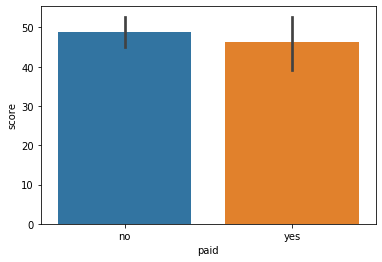

In [27]:
sns.barplot(x = 'paid', y = 'score', data = stud[(stud['schoolsup'] == 'yes')&(stud['activities'] == 'yes')])

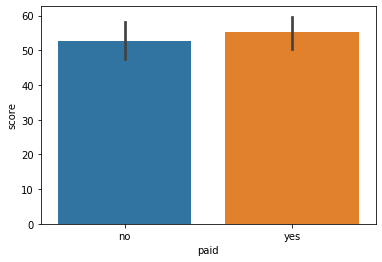

In [28]:
sns.barplot(x = 'paid', y = 'score', data = stud[(stud['schoolsup'] == 'no')&(stud['activities'] == 'no')])

В выборках выше мы проверили влияние на учебу таких показателей как дополнительная образовательная поддержка и дополнительные внеучебные занятия. Наблюдая графики выше, можно прийти к выводу, что дети, которые больше занимаются дополнительным образованием и дополнительными внеучебными занятиями хуже успевают по математике. Видимо, перегружать детей дополнительными занятиями не следует. Хотя, следуя цифрам данной выборки, отношения с родителями у детей, занимающихся вне школы дополнительно - хорошие.

In [29]:
stud[(stud['schoolsup'] == 'yes')&(stud['activities'] == 'yes')].romantic.value_counts()

no     18
yes     7
Name: romantic, dtype: int64

In [30]:
stud[(stud['schoolsup'] == 'no')&(stud['activities'] == 'no')].romantic.value_counts()

no     96
yes    55
Name: romantic, dtype: int64

Видимо, наличие свободного времени, потраченного на отношения, больше стимулирует уровень успеваемости, чем дополнительные занятия.

In [31]:
stud[(stud['schoolsup'] == 'yes')&(stud['activities'] == 'yes')].sex.value_counts()

F    18
M     9
Name: sex, dtype: int64

In [32]:
stud[(stud['schoolsup'] == 'no')&(stud['activities'] == 'no')].sex.value_counts()

F    92
M    70
Name: sex, dtype: int64

Проверим, как влияют дополнительные занятия с репетитором(paid) на уровень образования.

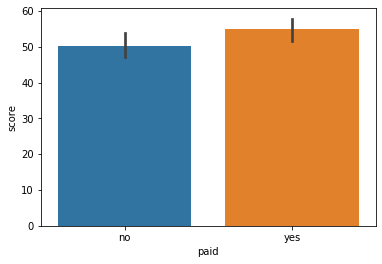

In [9]:
sns.barplot(x = 'paid', y = 'score', data = stud)

Предсказуемый результат. Посмотрим в каких семьях (больших GT3 или маленьких LE3 чаще дети занимаются дополнительно с репетитором)

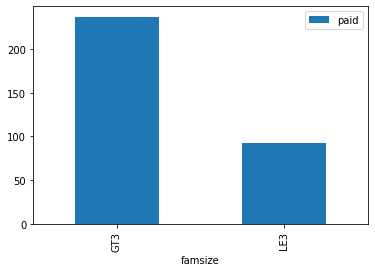

In [11]:
stud.pivot_table(values = 'paid', 
               index = 'famsize', 
               aggfunc = 'count').plot(kind = 'bar')

Дети из больших семей чаще обращаются за помощью репетиторов. Посмотрим на возраст детей, которые обращаются за помощью репетиторов.

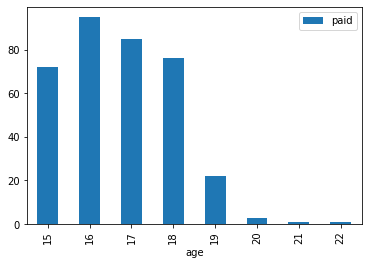

In [13]:
stud.pivot_table(values = 'paid', 
               index = 'age', 
               aggfunc = 'count').plot(kind = 'bar')

Чаще всего, услугами репетиторов пользуются дети в возрасте 16-17 лет.

Посмотрим на выборку студентов, которые пользуются платными услугами педагогов.

In [15]:
stud[stud['paid'] == 'yes'].describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
count,155.000000,155.000000,145.000000,145.000000,151.000000,146.000000,146.000000,151.000000,152.000000,148.000000,149.000000,155.000000
mean,16.670968,2.948387,2.620690,1.400000,2.264901,0.184932,3.917808,3.178808,3.171053,3.398649,7.060403,54.937646
std,1.217351,1.061692,1.061112,0.628048,0.830277,0.538240,0.943265,0.980382,1.108524,1.446271,18.580078,19.195864
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,2.000000,2.000000,0.000000,45.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,4.000000,2.000000,3.000000,0.000000,4.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,20.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,212.000000,95.000000


Мы видим, что большинство этих студентов имеют хорошее здоровье, достаточно много свободного времени после школы, достаточно много времени проводят с друзьями, в среднем, не много пропускают занятий, тратят не так много времени на учебу в неделю. Имеют достаточно неплохо образованных родителей. Вернемся к выборке студентов, у которых плохое здоровье и попытаемся разобраться почему же все таки здоровые дети, пользующиеся услугами репетиторов имеют средний бал ниже, чем дети с проблемами со здоровьем.

In [16]:
stud[stud['health'] == 1.0].describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
count,47.000000,47.000000,46.000000,46.000000,46.000000,43.000000,43.000000,46.000000,46.000000,47.0,44.000000,47.000000
mean,16.574468,2.957447,2.500000,1.413043,2.021739,0.162791,3.813953,3.217391,3.152174,1.0,6.363636,59.361702
std,1.485359,1.102516,1.090362,0.685601,0.802472,0.574466,1.219989,1.093680,1.173170,0.0,9.671562,21.759981
min,15.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000
25%,15.000000,2.000000,2.000000,1.000000,2.000000,0.000000,3.000000,2.250000,2.000000,1.0,0.000000,50.000000
50%,17.000000,3.000000,2.500000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.0,4.000000,65.000000
75%,17.500000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,1.0,7.250000,75.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,1.0,56.000000,95.000000


Для начала посмотрим как много из них пользуется услугами платных преподавателей.

In [17]:
stud[stud['health'] == 1.0].paid.value_counts()

yes    24
no     18
Name: paid, dtype: int64

Больше половины из них пользуется, давайте посмотрим только на тех, кто не польузется и на их средний балл.

In [19]:
stud[(stud['health'] == 1.0)&(stud['paid'] == 'no')].describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
count,18.000000,18.000000,17.000000,18.000000,18.000000,18.000000,15.000000,17.000000,18.000000,18.0,17.000000,18.000000
mean,16.666667,2.944444,2.411765,1.277778,2.111111,0.166667,4.400000,3.470588,3.055556,1.0,8.470588,59.722222
std,1.847096,1.211330,1.121318,0.574513,0.963382,0.707107,0.828079,0.943242,1.211330,0.0,13.196200,19.056589
min,15.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.0,0.000000,25.000000
25%,15.000000,2.250000,2.000000,1.000000,1.250000,0.000000,4.000000,3.000000,3.000000,1.0,2.000000,46.250000
50%,16.000000,3.000000,2.000000,1.000000,2.000000,0.000000,5.000000,4.000000,3.000000,1.0,6.000000,60.000000
75%,17.750000,4.000000,3.000000,1.000000,2.750000,0.000000,5.000000,4.000000,4.000000,1.0,8.000000,73.750000
max,22.000000,4.000000,4.000000,3.000000,4.000000,3.000000,5.000000,5.000000,5.000000,1.0,56.000000,95.000000


Этих студентов 18 человек в данной выборке, удовлетворяющих этим условиям. По описанию числовых параметров датасета не совсем ясно, чем они отличаются от других и как им удается учиться лучше здоровых, занимающихся с репетиторами, студентов. Надо смотреть по не числовым столбцам. Проанализируем все столбцы и начнем со школы.

In [20]:
stud[(stud['health'] == 1.0)&(stud['paid'] == 'no')].school.value_counts()

GP    16
MS     2
Name: school, dtype: int64

Большинство учится в "GP". Затем пол

In [21]:
stud[(stud['health'] == 1.0)&(stud['paid'] == 'no')].sex.value_counts()

F    13
M     5
Name: sex, dtype: int64

Большинство - девушки. Адрес.

In [23]:
stud[(stud['health'] == 1.0)&(stud['paid'] == 'no')].address.value_counts()

U    16
R     2
Name: address, dtype: int64

Большинство проживает по адресу "U". Размер семьи

In [25]:
stud[(stud['health'] == 1.0)&(stud['paid'] == 'no')].famsize.value_counts() 

GT3    9
LE3    8
Name: famsize, dtype: int64

Интересно, количество семей почти равное...Как зависит успеваемость в этой выборке от размеров семьи.

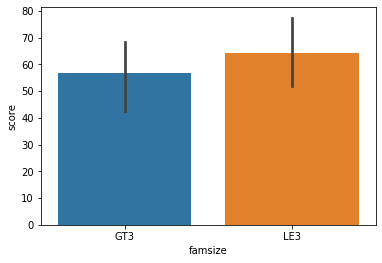

In [26]:
sns.barplot(x = 'famsize', y = 'score', data = stud[(stud['health'] == 1.0)&(stud['paid'] == 'no')])

В этой выборке дети из малых семей показывают лучшие результаты оценок. Далее смотрим статус родителей.

In [27]:
stud[(stud['health'] == 1.0)&(stud['paid'] == 'no')].Pstatus.value_counts() 

T    14
A     3
Name: Pstatus, dtype: int64

Родителей, живущих раздельно небольшое количество. Смотрим дальше (Mjob,Fjob)

In [28]:
stud[(stud['health'] == 1.0)&(stud['paid'] == 'no')].Mjob.value_counts() 

other       9
services    4
teacher     3
at_home     2
Name: Mjob, dtype: int64

In [30]:
stud[(stud['health'] == 1.0)&(stud['paid'] == 'no')].Fjob.value_counts() 

other       6
services    5
at_home     2
teacher     1
Name: Fjob, dtype: int64

По этим данным тяжело делать выводы, потому что большинство родителей работают в сферах, не отображенных однозначно в таблице. Дальше идет причина выбора школы. Предлагаю пропустить этот столбец в рамках данного анализа, поскольку он не может повлиять на оценки учащихся. Далее идет опека.

In [31]:
stud[(stud['health'] == 1.0)&(stud['paid'] == 'no')].guardian.value_counts() 

mother    15
father     2
Name: guardian, dtype: int64

Не ясно как это может повлиять на учебу, если родители в основном живут вместе. Далее идет дополнительная образовательная поддержка.

In [33]:
stud[(stud['health'] == 1.0)&(stud['paid'] == 'no')].schoolsup.value_counts() 

no     14
yes     4
Name: schoolsup, dtype: int64

Не ясно что конкретно представляет собой дополнительная образовательная поддержка, но мы видим в данных, что большинство ей не пользуется. Далее идет более важный, на мой взгляд, показатель - это семейная образовательная поддержка.

In [35]:
stud[(stud['health'] == 1.0)&(stud['paid'] == 'no')].famsup.value_counts() 

no     10
yes     7
Name: famsup, dtype: int64

Интересный момент - как именно интерпретировать "семейную образовательную поддержку". Если семья дает деньги на платных репетиторов, то, наверное, это тоже можно назвать "образовательной поддержкой". Но сейчас мы смотрим столбцы, в которых мы принудительно задаем параметр дополнительных платных занятий как "no", поэтому, предположим, что эта поддержка исходит непосредственно от семьи в виде помощи в учебе от братьев/сестер/родителей. Причем мы можем проверить параметры братьев/сестер через размер семьи и предположить, что там, где в семье больше одного ребенка - поддержка может идти и от братьев и сестер, тогда как глядя на колонку работы родителей, можно предположить о помощи, исходящей от родителей. Но, для начала, посмотрим на показатели успеваемости просто исходя из факта наличия или отсутствия этой самой поддержки.

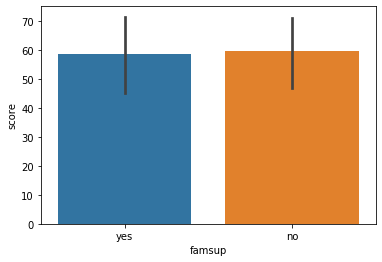

In [36]:
sns.barplot(x = 'famsup', y = 'score', data = stud[(stud['health'] == 1.0)&(stud['paid'] == 'no')])

Интересно, получается, что дети учатся одинаково, имея эту поддержку или не имея. При этом, если вспомнить график выше, где сравнивались параметры размеров семьи, то можно предположить, что дети, которые учатся сами (без помощи братьев/сестер) - учатся лучше. Вообще, тут еще важен момент старшие они в семье или же младшие, потому что будут прямо противоположные результаты. Ведь если ребенок старший, то помогать должен он, а не ему, а вот если младший - то старшие(смотря, конечно, сколько им лет и нет ли у них уже собственной семьи) могли бы оказать поддержку в учебе. В общем, вопрос с учебной поддержкой весьма и весьма многогранен.

Посмотрим на оставшиеся колонки выборки детей (health = 1, paid = "no"). activities.

In [37]:
stud[(stud['health'] == 1.0)&(stud['paid'] == 'no')].activities.value_counts() 

no     9
yes    7
Name: activities, dtype: int64

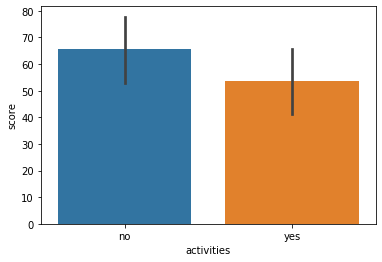

In [38]:
sns.barplot(x = 'activities', y = 'score', data = stud[(stud['health'] == 1.0)&(stud['paid'] == 'no')])

В общем, как и в предыдущий раз, когда анализировалось влияние дополнительных внеучебных занятий на учебу, результат остается не однозначным...Да, конечно, развивать детей, отдавая их на кружки и всевозможные спортивные занятия нужно, но окажет ли это положительное влияние на учебу - вряд ли.
Далее идет столбец, который вообще еще ни разу не рассматривался - это столбец nursery (детский сад).

In [39]:
stud[(stud['health'] == 1.0)&(stud['paid'] == 'no')].nursery.value_counts() 

yes    15
no      3
Name: nursery, dtype: int64

Большая часть детей ходила в детский сад. Интересно проследить цепочку взаимодействия детей в социуме:"детский сад" -> "общение с друзьями"(/"здоровье") -> "оценки". Добавил сравнение с здоровьем, поскольку минздрав утверждает, что детский организм проходит закалку в саду и иммунитет укрепляется в саду.

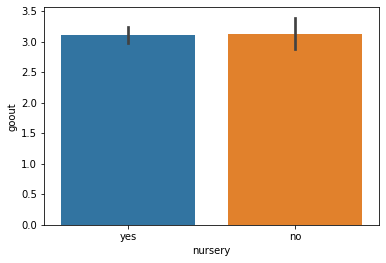

In [43]:
sns.barplot(x = 'nursery', y = 'goout', data = stud) #Как видно на графике, на общение с друзьями дет сад мало влияет

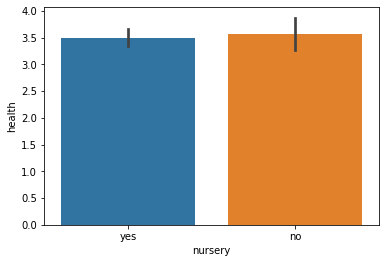

In [45]:
sns.barplot(x = 'nursery', y = 'health', data = stud) #Выборка опровергает утверждения минздрава:)

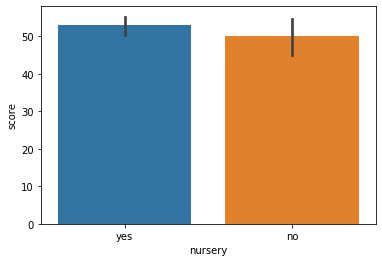

In [46]:
sns.barplot(x = 'nursery', y = 'score', data = stud) #Интересно, а вот на оценки детский сад влияет положительно

Вернемся к выборке студентов с не очень хорошим здоровьем, которые не пользовались дополнительными платными занятиями по математике. Посмотрим на их стремление получать высшее образование.

In [40]:
stud[(stud['health'] == 1.0)&(stud['paid'] == 'no')].higher.value_counts()

yes    16
no      1
Name: higher, dtype: int64

Абсолютное большинство этих детей планирует поступать в высшие учебные заведения. Далее идет наличие интернета

In [47]:
stud[(stud['health'] == 1.0)&(stud['paid'] == 'no')].internet.value_counts()

yes    14
no      1
Name: internet, dtype: int64

Ранее мы уже выявляли положительную связь между наличием интернета и оценками учеников. В этой выборке успевающих студентов интернет есть почти у всех. Последняя колонка, которую осталось проанализировать - это романтические отношения.

In [49]:
stud[(stud['health'] == 1.0)&(stud['paid'] == 'no')].romantic.value_counts()

no     13
yes     4
Name: romantic, dtype: int64

In [50]:
stud[(stud['health'] == 1.0)&(stud['paid'] == 'no')]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
20,GP,M,15,U,GT3,T,4.0,3.0,teacher,other,reputation,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,NaN,4.0,1.0,1.0,0.0,75.0
43,GP,M,15,U,GT3,T,2.0,2.0,services,services,course,father,1.0,1.0,0.0,yes,yes,no,NaN,yes,yes,yes,no,NaN,4.0,1.0,1.0,0.0,55.0
62,GP,F,16,U,LE3,T,1.0,2.0,other,services,reputation,father,1.0,2.0,0.0,yes,no,no,yes,yes,yes,yes,no,4.0,4.0,3.0,1.0,4.0,45.0
65,GP,F,16,U,LE3,T,4.0,3.0,teacher,services,course,mother,3.0,2.0,0.0,no,yes,no,yes,yes,yes,NaN,no,5.0,4.0,3.0,1.0,2.0,75.0
76,GP,M,15,U,NaN,T,4.0,0.0,teacher,other,course,mother,2.0,4.0,0.0,no,no,no,yes,yes,NaN,yes,no,3.0,4.0,3.0,1.0,8.0,50.0
87,GP,F,15,U,GT3,T,4.0,2.0,other,other,reputation,mother,1.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,no,5.0,3.0,3.0,1.0,4.0,70.0
98,GP,F,16,U,GT3,T,4.0,4.0,other,other,reputation,NaN,1.0,1.0,0.0,no,NaN,no,yes,no,yes,NaN,no,5.0,3.0,4.0,1.0,6.0,70.0
120,GP,F,15,U,GT3,T,1.0,2.0,at_home,NaN,course,mother,1.0,2.0,0.0,no,no,no,no,no,yes,yes,no,3.0,2.0,3.0,1.0,NaN,75.0
126,GP,F,15,U,LE3,A,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,yes,no,no,NaN,yes,yes,yes,yes,5.0,3.0,2.0,1.0,0.0,55.0


Попробуем как-то резюмировать все наблюдения выше, взглянув на выборки успевающих и неуспевающих студентов в отдельности. За успевающих возьмем тех, кто имеет результаты выше среднего за тест по математике.

In [51]:
stud.score.describe()

count    395.000000
mean      52.241072
std       22.745834
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Учитывая показатели среднего, медианы и стандартного отклонения посмотрим на студентов, которые имеют оценку более 50 по тесту.

In [53]:
stud_high_score = stud[stud['score'] > 50]
stud_high_score

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,MS,F,18,R,LE3,T,4.0,NaN,other,NaN,reputation,mother,2.0,3.0,0.0,no,no,no,no,yes,yes,yes,no,5.0,4.0,4.0,1.0,0.0,95.0
376,MS,F,20,NaN,GT3,T,4.0,2.0,health,other,course,NaN,2.0,3.0,2.0,no,yes,yes,no,no,yes,yes,yes,5.0,4.0,3.0,3.0,4.0,75.0
378,MS,F,18,U,GT3,T,3.0,3.0,other,other,home,mother,1.0,2.0,0.0,no,no,yes,no,yes,yes,yes,yes,4.0,1.0,3.0,1.0,0.0,75.0
380,MS,M,18,U,GT3,T,4.0,4.0,teacher,teacher,home,father,1.0,2.0,0.0,no,no,yes,yes,no,yes,yes,NaN,3.0,2.0,4.0,2.0,4.0,70.0


In [54]:
stud_high_score.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
count,213.000000,213.000000,200.000000,198.000000,208.00000,199.000000,199.000000,204.000000,209.000000,208.000000,205.000000,213.000000
mean,16.535211,2.901408,2.860000,1.373737,2.12500,0.115578,3.939698,3.245098,2.966507,3.524038,7.170732,67.938842
std,1.226642,1.070464,2.849738,0.630621,0.86463,0.364745,0.962101,1.006739,1.062394,1.451103,27.387830,11.432615
min,15.000000,0.000000,0.000000,1.000000,1.00000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,50.167598
25%,16.000000,2.000000,2.000000,1.000000,2.00000,0.000000,4.000000,3.000000,2.000000,2.750000,0.000000,60.000000
50%,16.000000,3.000000,3.000000,1.000000,2.00000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,65.000000
75%,17.000000,4.000000,4.000000,2.000000,3.00000,0.000000,5.000000,4.000000,4.000000,5.000000,7.000000,75.000000
max,20.000000,4.000000,40.000000,4.000000,4.00000,2.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


### Картина складывается следующая: успешными детьми можно считать тех детей, которые находятся в возрасте между 16 до 17 лет. Родители этих детей имеют хорошее образование (специальное или высшее). Затраченное на дорогу до школы время меньше 2-х часов. Затрачиваемое на учебу время в неделю превышает 2 часа. Число внеучебных неудач равно 0. Семейные отношения находятся на хорошем уровне. Дети имеют достаточное количество свободного времени и времени для общения с друзьями. Студенты не имеют серьезных проблем со здоровьем. Количество пропущенных занятий лежит в интервале от 7 до 8.

Посмотрим на не числовые показатели

In [55]:
stud_high_score.school.value_counts()

GP    194
MS     19
Name: school, dtype: int64

In [56]:
stud_high_score.sex.value_counts()

F    107
M    106
Name: sex, dtype: int64

In [57]:
stud_high_score.age.value_counts()

16    62
15    51
17    50
18    37
19    11
20     2
Name: age, dtype: int64

In [58]:
stud_high_score.address.value_counts()

U    167
R     34
Name: address, dtype: int64

In [59]:
stud_high_score.famsize.value_counts()

GT3    143
LE3     60
Name: famsize, dtype: int64

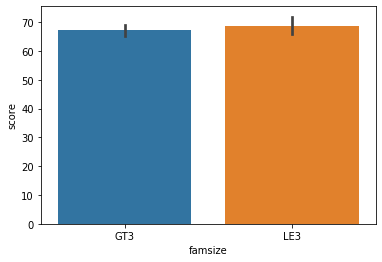

In [92]:
sns.barplot(x = 'famsize', y = 'score', data = stud_high_score)

In [60]:
stud_high_score.Pstatus.value_counts()

T    166
A     21
Name: Pstatus, dtype: int64

In [61]:
stud_high_score.Mjob.value_counts()

other       72
services    60
teacher     28
health      23
at_home     20
Name: Mjob, dtype: int64

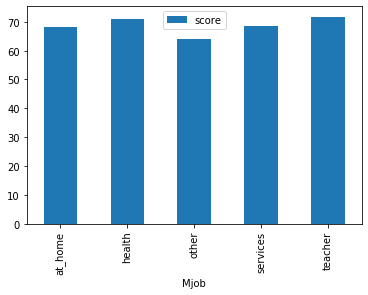

In [93]:
stud_high_score.pivot_table(values = 'score', 
               index = 'Mjob', 
               aggfunc = 'mean').plot(kind = 'bar')

In [62]:
stud_high_score.Fjob.value_counts()

other       105
services     53
teacher      20
at_home       9
health        8
Name: Fjob, dtype: int64

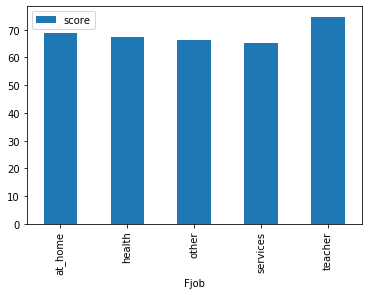

In [94]:
stud_high_score.pivot_table(values = 'score', 
               index = 'Fjob', 
               aggfunc = 'mean').plot(kind = 'bar')

In [63]:
stud_high_score.reason.value_counts()

course        69
reputation    60
home          56
other         18
Name: reason, dtype: int64

In [64]:
stud_high_score.guardian.value_counts()

mother    137
father     47
other      13
Name: guardian, dtype: int64

In [69]:
stud_high_score[stud_high_score['Pstatus'] == 'A'].guardian.value_counts() #Уточняем информацию насчет опекунов в семьях, где родители проживают раздельно

mother    16
other      3
father     2
Name: guardian, dtype: int64

In [70]:
stud_high_score.schoolsup.value_counts()

no     190
yes     20
Name: schoolsup, dtype: int64

In [96]:
stud_high_score[stud_high_score['schoolsup'] == 'yes'].score.describe()

count    20.000000
mean     59.766760
std       8.636716
min      50.167598
25%      55.000000
50%      55.000000
75%      61.250000
max      85.000000
Name: score, dtype: float64

In [71]:
stud_high_score.famsup.value_counts()

yes    116
no      73
Name: famsup, dtype: int64

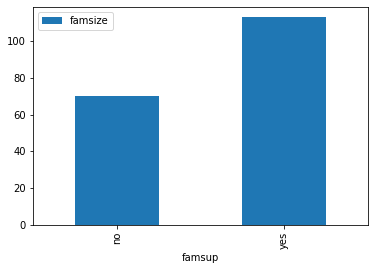

In [101]:
stud_high_score.pivot_table(values = 'famsize', 
               index = 'famsup', 
               aggfunc = 'count').plot(kind = 'bar')

In [105]:
stud_high_score[stud_high_score['famsup'] == 'yes'].famsize.value_counts()

GT3    84
LE3    29
Name: famsize, dtype: int64

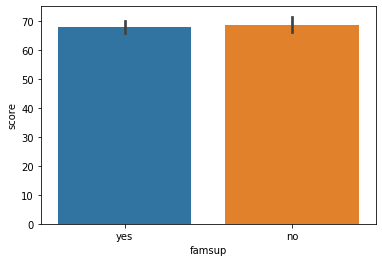

In [97]:
sns.barplot(x = 'famsup', y = 'score', data = stud_high_score)

In [74]:
stud_high_score.paid.value_counts()

no     105
yes     88
Name: paid, dtype: int64

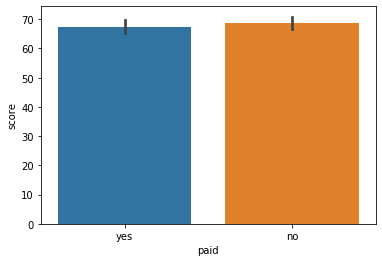

In [75]:
sns.barplot(x = 'paid', y = 'score', data = stud_high_score)

In [108]:
stud_high_score[stud_high_score['paid'] == 'no'].score.describe()

count    105.000000
mean      68.718768
std       11.863390
min       50.167598
25%       60.000000
50%       65.000000
75%       75.000000
max      100.000000
Name: score, dtype: float64

In [109]:
stud_high_score[stud_high_score['paid'] == 'yes'].score.describe()

count    88.000000
mean     67.333354
std      11.056740
min      50.167598
25%      55.000000
50%      65.000000
75%      75.000000
max      95.000000
Name: score, dtype: float64

In [76]:
stud_high_score.activities.value_counts()

yes    107
no      99
Name: activities, dtype: int64

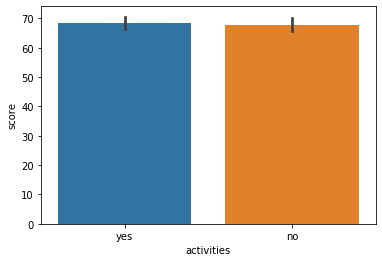

In [77]:
sns.barplot(x = 'activities', y = 'score', data = stud_high_score)

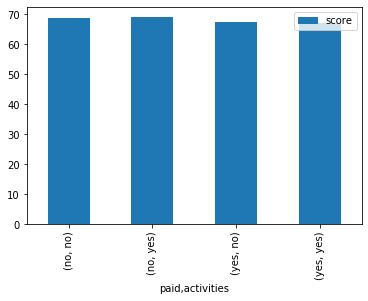

In [78]:
stud_high_score.pivot_table(values = 'score', 
               index = ['paid','activities'], 
               aggfunc = 'mean').plot(kind = 'bar')

In [80]:
stud_high_score[(stud_high_score['paid'] == 'no')&(stud_high_score['activities'] == 'no')].score.mean()

68.9060606060606

In [81]:
stud_high_score[(stud_high_score['paid'] == 'no')&(stud_high_score['activities'] == 'yes')].score.mean()

69.04168457241083

In [82]:
stud_high_score[(stud_high_score['paid'] == 'yes')&(stud_high_score['activities'] == 'no')].score.mean()

67.44311214061861

In [83]:
stud_high_score[(stud_high_score['paid'] == 'yes')&(stud_high_score['activities'] == 'yes')].score.mean()

67.27653631284916

In [87]:
stud_high_score.nursery.value_counts()

yes    160
no      45
Name: nursery, dtype: int64

In [88]:
stud_high_score.higher.value_counts()

yes    199
no       4
Name: higher, dtype: int64

In [89]:
stud_high_score.internet.value_counts()

yes    167
no      27
Name: internet, dtype: int64

In [90]:
stud_high_score.romantic.value_counts()

no     130
yes     64
Name: romantic, dtype: int64

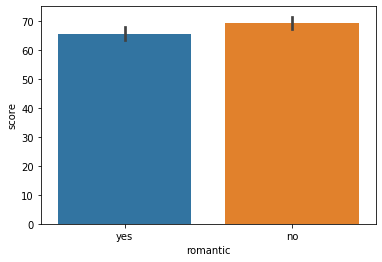

In [91]:
sns.barplot(x = 'romantic', y = 'score', data = stud_high_score)

In [112]:
stud_high_score[(stud_high_score['romantic'] == 'yes')].score.describe()

count    64.000000
mean     65.783869
std       9.390704
min      50.167598
25%      58.750000
50%      65.000000
75%      75.000000
max      90.000000
Name: score, dtype: float64

In [113]:
stud_high_score[(stud_high_score['romantic'] == 'no')].score.describe()

count    130.000000
mean      69.506199
std       12.346507
min       50.167598
25%       60.000000
50%       70.000000
75%       75.000000
max      100.000000
Name: score, dtype: float64

### Выводы по нечисловым столбцам можно сделать следующие: подавляющее большинство студентов с хорошими оценками учится в школе "GP", количество юношей и девушек среди успевающих студентов, примерно, равно, их основная возростная группа 15-18 лет включительно, большинство из них проживает в районе "U", основная часть этих студентов из больших семей (оценки детей из малых семей(LE3) чуть выше детей из больших семей(GT3)), порядка 11% родителей этих студентов не живут вместе, дети учителей и медработников лучше справляются с тестом по математике, а также дети отцов(хоть их и не много), которые сидят дома, весьма неплохо сдают эти тесты. Большинство родителей этих студентов делали выбор в пользу той или иной школы по причинам: курс, репутация и близость к дому (по убыванию популярности ответов). В большинстве случаев (76%) опекунами детей, чьи родители живут раздельно являются матери. Около 10% детей пользуются образовательной поддержкой (их средний балл ниже среднего балла студентов из выборки stud_high_score на 10 баллов). Большинство студентов в выборке stud_high_score пользуются поддержкой семьи и большая часть тех, кто пользуется этой поддержкой - дети из больших семей (на непосредственной оценке по тесту это никак не отражается). Большинство(54%) студентов в этой выборке не пользуются дополнительными платными занятиями по математике, при этом оценки этих студентов чуть выше тех, кто пользуется такими занятиями ( не значительно - средняя разница 1 балл). В выборке на дополнительные внеучебные занятия ходит столько же студентов, сколько не ходит. Средний балл от этого не изменяется. При этом, если посмотреть на тех студентов, кто ходит и на дополнительные занятия по математике и на дополнительные внеучебные занятия, то можно увидеть, что их средний балл немного ниже среднего балла студентов, которые не ходят на допы (не значительно - на 1.7 балла выше у тех, кто не ходит ни к репетиторам ни на дополнительные внеклассные занятия). Подавляющее большинство студентов выборки посещало детский сад (78%). Практически все студенты планируют поступать в высшие учебные заведения. У 14% студентов нет интернета, у остальных он есть. 67% студентов не состоит в романтических отношениях и учатся из-за этого немного лучше (около +5 быллов по тесту).

Проверим гипотезу о том, что распределение оценок студентов по различным параметрам неразличимы.

In [32]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:5]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score'], equal_var = False).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

Отбросим из списка проверки "reason"(так как причина выбора школы не может повлиять на оценки учащихся, поскольку это чисто субъективная оценка родителей ученика, основанная, скорее, на репутации школы и ее территориальной локации), 

In [33]:
for col in ['school', 'sex', 'address', 'Pstatus', 'famsize', 'Mjob', 'Fjob', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки romantic


Как видно серьезно отличаются только 5 параметров: sex, address, Mjob, schoolsup, romantic. Оставим эти колонки в выборке для дальнейшего построения модели. 

In [34]:
stud_for_model = stud.loc[:, ['sex', 'address', 'Mjob', 'schoolsup','romantic']]
stud_for_model.head()

,sex,address,Mjob,schoolsup,romantic
0,F,U,at_home,yes,no
1,F,U,at_home,no,no
2,F,U,at_home,yes,None
3,F,U,health,no,yes
4,F,U,other,no,no


### В результате проведения теста Стьюдента мы получили достаточно неожиданные результаты, которые мало коррелируют с тем анализом столбцов, который проводился ранее...Из всех параметров, которые по результатам теста Стьюдента предлагается использовать для составления модели, заметное влияние на итоговый результат теста было замечено только за столбцом "romantic" в исследованиях, проводимых перед тестом Стьюдента.

In [28]:
stud.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

In [29]:
stud.address.value_counts()

U    295
R     83
Name: address, dtype: int64

In [30]:
stud.Mjob.value_counts()

other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

In [35]:
stud.schoolsup.value_counts()

no     335
yes     51
Name: schoolsup, dtype: int64

In [31]:
stud.romantic.value_counts()

no     240
yes    124
Name: romantic, dtype: int64

Из выборок видно, что только в столбцах адреса и дополнительной образовательной поддержки идет значительный перевес количества измерений в сторону адреса "U" и в сторону отсутствия дополнительной образовательной поддержки соответственно.

Запустим тест Стьюдента для числовых переменных и посмотрим на результат.

In [37]:
for col in ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки absences


In [38]:
stud_for_model = stud.loc[:, ['sex', 'address', 'Medu', 'Mjob', 'failures', 'schoolsup', 'romantic', 'absences']]
stud_for_model.head()

,sex,address,Medu,Mjob,failures,schoolsup,romantic,absences
0,F,U,4,at_home,0,yes,no,6
1,F,U,1,at_home,0,no,no,4
2,F,U,1,at_home,3,yes,None,10
3,F,U,4,health,0,no,yes,2
4,F,U,3,other,0,no,no,4


### В результате проведения теста Стьюдента для проверки числовых значений в выборке получены результаты, подмеченные ранее при анализе столбцов с помощью графиков. По результатам анализа числовых и не числовых колонок датасета для построения модели предлагается использовать колонки: sex, address, Medu, Mjob, failures, schoolsup, romantic, absences.

P.S. По личным впечатлениям, стоит применять оба метода оценки информации в дата сете и не стоит ограничиваться только тестом Стьюдента или только построением графиков.

P.P.S. jupyter nbextensions установить на мой компьютер не получилось. Старался писать код короче и с максимальным количеством пояснений.